# Дипломный проект.

## Описание проекта.

**Мобильные приложения — Анализ поведения пользователей в мобильном приложении.**


**Задача:**

1. Проанализируйте связь целевого события — просмотра контактов — и других действий пользователей.

2. Оцените, какие действия чаще совершают те пользователи, которые просматривают контакты.
- Проведите исследовательский анализ данных
- Проанализируйте влияние событий на совершение целевого события
- Проверьте статистические гипотезы
    1. Одни пользователи совершают действия `tips_show` и `tips_click`, другие — только `tips_show`. Проверьте гипотезу: конверсия в просмотры контактов различается у этих двух групп.
    2. Сформулируйте собственную статистическую гипотезу. Дополните её нулевой и альтернативной гипотезами. Проверьте гипотезу с помощью статистического теста.
    
3. В процессе исследования необходимо провести выделение сценариев использования приложения пользователями и ответить на вопросы:

- Какие события влияют на конверсию в целевое действие?

- Какие сценарии использования приложения выделяются?

- Как различается время между распространенными событиями пользователя?

## Описание данных.

Датасет содержит данные о событиях, совершенных в мобильном приложении "Ненужные вещи". В нем пользователи продают свои ненужные вещи, размещая их на доске объявлений.

В датасете содержатся данные пользователей, впервые совершивших действия в приложении после 7 октября 2019 года.

Колонки в *mobile_sources.csv*: 

- `userId` — идентификатор пользователя,
- `source` — источник, с которого пользователь установил приложение.

Колонки в mobile_dataset.csv: **

- `event.time` — время совершения,
- `user.id` — идентификатор пользователя,
- `event.name` — действие пользователя.

Виды действий:

- `advert_open` — открыл карточки объявления,
- `photos_show` — просмотрел фотографий в объявлении,
- `tips_show` — увидел рекомендованные объявления,
- `tips_click` — кликнул по рекомендованному объявлению,
- `contacts_show` и `show_contacts` — посмотрел номер телефона,
- `contacts_call` — позвонил по номеру из объявления,
- `map` — открыл карту объявлений,
- `search_1`—`search_7` — разные действия, связанные с поиском по сайту,
- `favorites_add` — добавил объявление в избранное.

## Предобработка данных.

**Цели и задачи предобработки данных:**
1) Привести название столбцов в *змеиный* регистр и строчный формат;   
2) Проверить датасет на дубликаты/неявные дубликаты;  
3) Проверить датасет на пропуски. Принять решение о работе с пропусками;  
4) Проверить соответствие типов данных;  
5) Удалить дубликаты;  
6) Привести типы. 

Импортируем основные библиотеки для начала работы. Загрузим датасеты.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display
import scipy.stats as stats
from scipy import stats as st
import datetime as dt
import plotly.express as px
from plotly import graph_objects as go
import re 
import math as mth
import statsmodels.stats.proportion
from statsmodels.stats.proportion import proportions_ztest

In [2]:
mobile_sourсes = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_sources.csv') 

mobile_dataset = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')

In [3]:
import warnings
warnings.filterwarnings('ignore')

Произведем предообработку данных для датасета. Воспользуемся методом info() и изучим тип данных каждого столбца датасета.

In [4]:
mobile_sourсes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


### Изменение наименования столбцов.

В датасете mobile_sourсes представлены два столбца userid и source. Тип данных - object. Изменение типов данных не требуется. Изменим названия столбцов в *регистр python* с помощью метода rename.

In [5]:
mobile_sourсes.rename(columns = {'userId':'user_id'}, inplace = True)

Используем метод info() для датасета mobile_dataset.

In [6]:
mobile_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


Изменим названия столбцов с помощью метода rename и приведем их в *регистр python*.

In [7]:
mobile_dataset.rename(columns = {'event.time':'event_time', 'event.name':'event_name', 'user.id':'user_id'}, inplace = True)

### Изменение типов данных.

Столбец event_time содержит данные о дате и времени события, которое совершал пользователь. Необходимо изменить тип данных в данном столбце с помощью метода pd.to_datetime().

In [8]:
mobile_dataset.head()

event_time   event_name  \
0  2019-10-07 00:00:00.431357  advert_open   
1  2019-10-07 00:00:01.236320    tips_show   
2  2019-10-07 00:00:02.245341    tips_show   
3  2019-10-07 00:00:07.039334    tips_show   
4  2019-10-07 00:00:56.319813  advert_open   

                                user_id  
0  020292ab-89bc-4156-9acf-68bc2783f894  
1  020292ab-89bc-4156-9acf-68bc2783f894  
2  cf7eda61-9349-469f-ac27-e5b6f5ec475c  
3  020292ab-89bc-4156-9acf-68bc2783f894  
4  cf7eda61-9349-469f-ac27-e5b6f5ec475c

In [9]:
mobile_dataset['event_time'] = pd.to_datetime(mobile_dataset['event_time'], format="%Y.%m.%d %H:%M:%S")

In [10]:
mobile_dataset['event_time'] = mobile_dataset['event_time'].dt.floor('s')

In [11]:
mobile_dataset.head()

event_time   event_name                               user_id
0 2019-10-07 00:00:00  advert_open  020292ab-89bc-4156-9acf-68bc2783f894
1 2019-10-07 00:00:01    tips_show  020292ab-89bc-4156-9acf-68bc2783f894
2 2019-10-07 00:00:02    tips_show  cf7eda61-9349-469f-ac27-e5b6f5ec475c
3 2019-10-07 00:00:07    tips_show  020292ab-89bc-4156-9acf-68bc2783f894
4 2019-10-07 00:00:56  advert_open  cf7eda61-9349-469f-ac27-e5b6f5ec475c

### Проверка на дубликаты.

Далее проверим датасеты на наличие дубликатов методом duplicated().sum()

In [12]:
mobile_sourсes.duplicated().sum()

0

Явных дубликатов в датасете mobile_sourсes не зафиксировано. Проверим датасет на присутствие неявных дубликатов. Для этого воспользуемся методом unique().

In [13]:
mobile_sourсes['source'].unique()

array(['other', 'yandex', 'google'], dtype=object)

В столбце source присутствуют три источника данных - other, yandex и google. Неявные дубликаты отсутствуют.

In [14]:
mobile_dataset.duplicated().sum()

1143

Явные дубликаты в датасете mobile_dataset отсутствуют. Проверим на наличие неявных дубликатов. Нас интересует столбец event_name в котором содержатся действия совершеные пользователями.

In [15]:
mobile_dataset['event_name'].unique()

array(['advert_open', 'tips_show', 'map', 'contacts_show', 'search_4',
       'search_5', 'tips_click', 'photos_show', 'search_1', 'search_2',
       'search_3', 'favorites_add', 'contacts_call', 'search_6',
       'search_7', 'show_contacts'], dtype=object)

В датасете присутствуют события - contacts_show и show_contacts. Похоже на неявные дубликаты. Приведём названия данных событий в единый вид с помощью метода str.replace.

In [16]:
mobile_dataset['event_name'] = mobile_dataset['event_name'].str.replace('contacts_show','show_contacts')

### Проверка на пропуски.

Воспользуемся методом isna().sum() и определим количество пропусков в каждом из столбцов датасета.

In [17]:
mobile_sourсes.isna().sum()

user_id    0
source     0
dtype: int64

Пропусков в датасете mobile_sourсes не обнаружено.

In [18]:
mobile_dataset.isna().sum()

event_time    0
event_name    0
user_id       0
dtype: int64

Пропусков в датасете mobile_dataset не обнаружено.

### Результаты предобработки данных.

**В результате предобработки данных были произведены следующие действия:**
1) Названия столбцов приведены к "питоньему" регистру;  
2) Столбец mobile_dataset['event_time'] приведен к формату datetime64[ns];  
3) Датасеты проверен на строки дубликаты. Явных дубликатов не обнаружено. Были обнаружены неявные дубликаты в столбце 
mobile_dataset['event_name']. Данные строки переименованы и приведены к одному наименованию - show_contacts;  
4) Датасеты проверены на пропуски методом data.isna().sum(). Пропуски не обнаружены.  

## Исследовательский анализ данных.

В процессе исследования необходимо провести выделение сценариев использования приложения пользователями и ответить на вопросы:

- Какие события влияют на конверсию в целевое действие?

- Какие сценарии использования приложения выделяются?

- Как различается время между распространенными событиями пользователя?

### Изучение датасета mobile_sourсes.

Начнем исследование с изучения данных представленых в каждых столбцах датасета mobile_sourсes.

In [19]:
mobile_sourсes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  4293 non-null   object
 1   source   4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


#### Количество пользователей и источник установки приложения.

Посчитаем количество уникальных пользователей в столбце user_id с помощью метода nunique().

In [20]:
mobile_sourсes['user_id'].nunique()

4293

В датасете присутствуют данные 4293 уникальных пользователей.

Теперь посчитаем долю пользователей из каждого источника.

In [21]:
users_by_source = mobile_sourсes.groupby('source').agg({'user_id':'nunique'}).reset_index()
users_by_source.columns = ['source', 'users_count']
users_by_source['percent'] = (users_by_source['users_count'] / len(mobile_sourсes['user_id'].unique()) *100).round(2)
users_by_source

source  users_count  percent
0  google         1129    26.30
1   other         1230    28.65
2  yandex         1934    45.05

Отобразим полученные данные на столбчатой диаграмме.

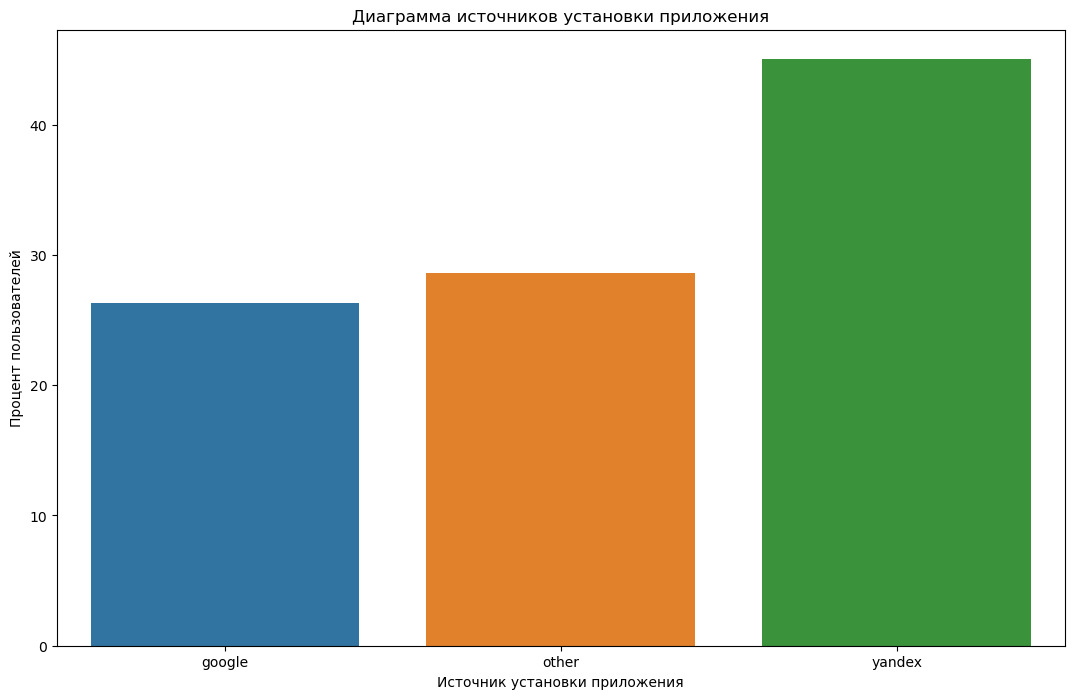

In [22]:
plt.figure(figsize = (13,8)) 
ax = sns.barplot(x=users_by_source['source'],y=users_by_source['percent'])
ax.set_xlabel('Источник установки приложения')
ax.set_ylabel('Процент пользователей')
plt.title('Диаграмма источников установки приложения')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0);

Всего представлены данные о трех источниках из которых пользователи установили приложение:

1) yandex - 1934 пользователя (доля 45.05%);  
2) other - 1230 пользователей (доля 28.65%);  
3) google - 1129 пользователей (доля 26.30%).   

Лидером по источнику установки является yandex. Между другими источниками (other) и источником google разница не слишком значительна.

### Изучение датасета mobile_dataset.

#### Объединение датасетов. 

Добавим в датасет mobile_dataset данные об источниках установки приложений (столбец source из датасета mobile_sourсes). Для этого воспользуемся методом merge и следаем группировку по столбцу user_id методом left join.

In [23]:
mobile_dataset = mobile_dataset.merge(mobile_sourсes, on='user_id', how='left')
mobile_dataset

event_time   event_name                               user_id  \
0     2019-10-07 00:00:00  advert_open  020292ab-89bc-4156-9acf-68bc2783f894   
1     2019-10-07 00:00:01    tips_show  020292ab-89bc-4156-9acf-68bc2783f894   
2     2019-10-07 00:00:02    tips_show  cf7eda61-9349-469f-ac27-e5b6f5ec475c   
3     2019-10-07 00:00:07    tips_show  020292ab-89bc-4156-9acf-68bc2783f894   
4     2019-10-07 00:00:56  advert_open  cf7eda61-9349-469f-ac27-e5b6f5ec475c   
...                   ...          ...                                   ...   
74192 2019-11-03 23:53:29    tips_show  28fccdf4-7b9e-42f5-bc73-439a265f20e9   
74193 2019-11-03 23:54:00    tips_show  28fccdf4-7b9e-42f5-bc73-439a265f20e9   
74194 2019-11-03 23:56:57     search_1  20850c8f-4135-4059-b13b-198d3ac59902   
74195 2019-11-03 23:57:06    tips_show  28fccdf4-7b9e-42f5-bc73-439a265f20e9   
74196 2019-11-03 23:58:12    tips_show  28fccdf4-7b9e-42f5-bc73-439a265f20e9   

       source  
0       other  
1       other  
2      yandex  
3       other  
4      yandex  
...       ...  
74192  google  
74193  google  
74194  google  
74195  google  
74196  google  

[74197 rows x 4 columns]

#### Определение периода данных.

Определим за какой период мы располагаем данными. Для этого необходимо определить минимальную и максимальную дату события. Воспользуемся методом min() и max() для столбца event_time.

In [24]:
mobile_dataset['event_time'].min()

Timestamp('2019-10-07 00:00:00')

Самая минимальная дата события - 2019-10-07 00:00:00 

In [25]:
mobile_dataset['event_time'].max()

Timestamp('2019-11-03 23:58:12')

Самая максимальная дата события - 2019-11-03 23:58:12

In [26]:
data_period = mobile_dataset['event_time'].max() - mobile_dataset['event_time'].min()

In [27]:
display(data_period)

Timedelta('27 days 23:58:12')

Следовательно в нашем датасете фигурируют данные за период равный 27 дней 23 часа 58 минут и 12 секунд.

#### Определение количества событий совершаемых пользователями.

Для начала создадим столбец week в котором укажем неделю на которой произошло событие. Также добавим столбец date с датой возникновения события.

In [28]:
mobile_dataset['week'] = mobile_dataset['event_time'].dt.week
mobile_dataset['date'] = mobile_dataset['event_time'].dt.strftime('%Y-%m-%d')
mobile_dataset

event_time   event_name                               user_id  \
0     2019-10-07 00:00:00  advert_open  020292ab-89bc-4156-9acf-68bc2783f894   
1     2019-10-07 00:00:01    tips_show  020292ab-89bc-4156-9acf-68bc2783f894   
2     2019-10-07 00:00:02    tips_show  cf7eda61-9349-469f-ac27-e5b6f5ec475c   
3     2019-10-07 00:00:07    tips_show  020292ab-89bc-4156-9acf-68bc2783f894   
4     2019-10-07 00:00:56  advert_open  cf7eda61-9349-469f-ac27-e5b6f5ec475c   
...                   ...          ...                                   ...   
74192 2019-11-03 23:53:29    tips_show  28fccdf4-7b9e-42f5-bc73-439a265f20e9   
74193 2019-11-03 23:54:00    tips_show  28fccdf4-7b9e-42f5-bc73-439a265f20e9   
74194 2019-11-03 23:56:57     search_1  20850c8f-4135-4059-b13b-198d3ac59902   
74195 2019-11-03 23:57:06    tips_show  28fccdf4-7b9e-42f5-bc73-439a265f20e9   
74196 2019-11-03 23:58:12    tips_show  28fccdf4-7b9e-42f5-bc73-439a265f20e9   

       source  week        date  
0       other    41  2019-10-07  
1       other    41  2019-10-07  
2      yandex    41  2019-10-07  
3       other    41  2019-10-07  
4      yandex    41  2019-10-07  
...       ...   ...         ...  
74192  google    44  2019-11-03  
74193  google    44  2019-11-03  
74194  google    44  2019-11-03  
74195  google    44  2019-11-03  
74196  google    44  2019-11-03  

[74197 rows x 6 columns]

Лучше всего визуализировать количество событий на каждого пользователя с помощью тепловой карты(heatmap). Построим сводную таблицу total_user_event с помощью метода pivot table.

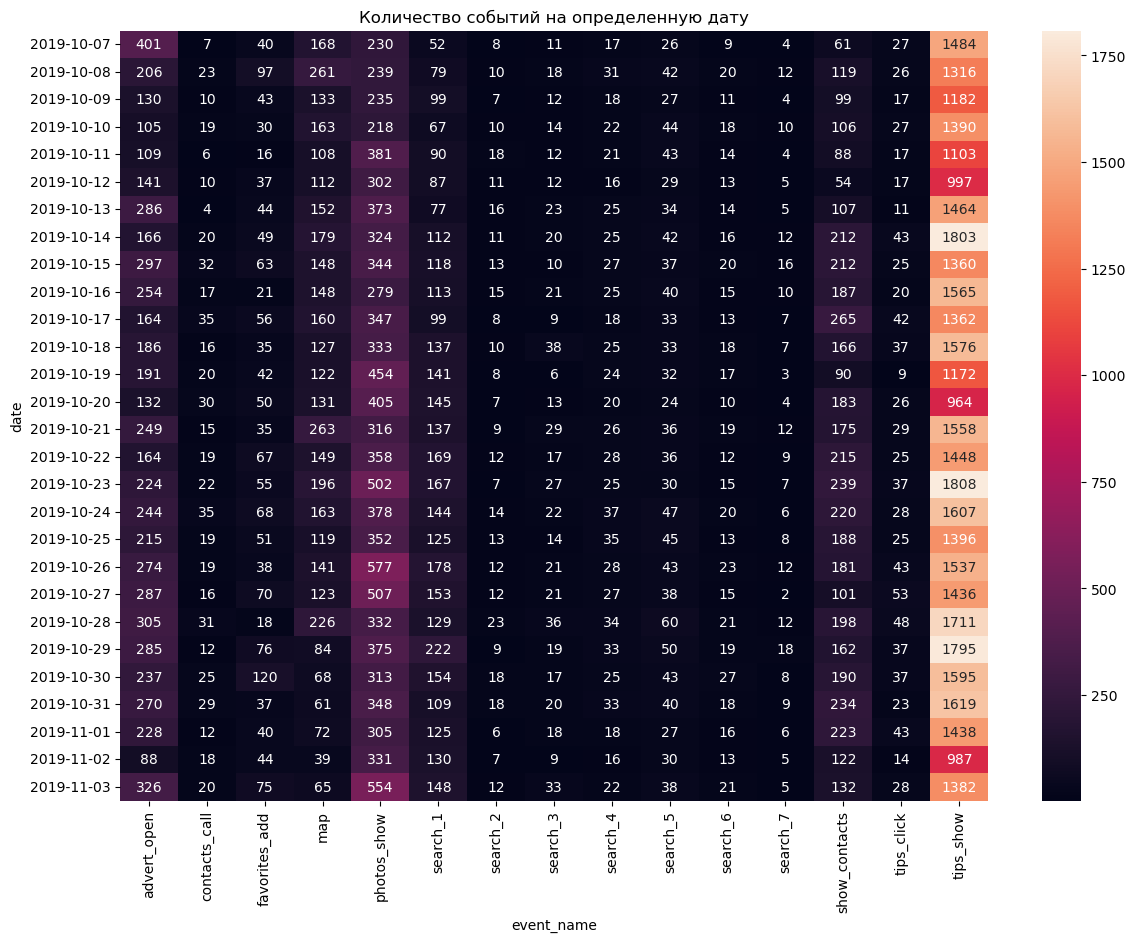

In [29]:
total_user_event = mobile_dataset.pivot_table(index='date', columns='event_name', values='event_time', aggfunc='count')
plt.figure(figsize=(14,10)) 
plt.title('Количество событий на определенную дату')
sns.heatmap(total_user_event, annot=True, fmt='', square=False);
plt.show()

На тепловой карте наблюдаем, что распределение событий на каждую дату достаточно равномерно. Однако есть события, которые выделяются: 

1) photos_show - значительный пик событий 2019-10-23, 2019-10-26, 2019-10-27, 2019-11-03. Почему-то именно в эти дни пользователи чаще просматривали фото в объявлениях;  
2) tips_show - значительный пик событий 2019-10-14, 2019-10-23, 2019-10-29. Именно в эти даты пользователи чаще всего видели рекомендованные объявления. 

Стоит отметить, что событие tips_show показывается всем пользователям автоматически и не зависит от их действий в приложении.

Построим аналогичную тепловую карту для каждой недели.

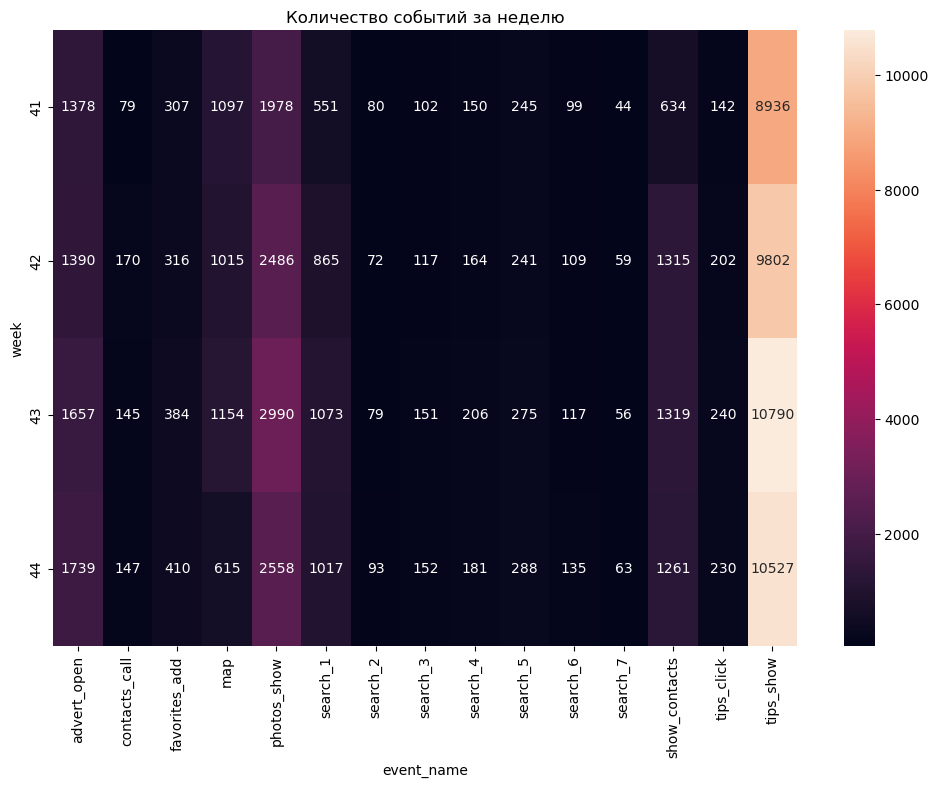

In [30]:
total_user_event = mobile_dataset.pivot_table(index='week', columns='event_name', values='event_time', aggfunc='count')
plt.figure(figsize=(12,8)) 
plt.title('Количество событий за неделю')
sns.heatmap(total_user_event, annot=True, fmt='', square=False);
plt.show()

На тепловой карте видим определенную особенность: события photos_show и tips_show чаще всего происходили на 43 неделе. 

Посмотрим сильно ли будет различаться количество событий по дням и неделям при использовании медианного и среднего значений.

In [31]:
mobile_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74197 entries, 0 to 74196
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
 3   source      74197 non-null  object        
 4   week        74197 non-null  int64         
 5   date        74197 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 4.0+ MB


In [32]:
count_of_events_meadian_average = mobile_dataset.groupby(['date', 'event_name'])['event_time'].count().reset_index()
count_of_events_meadian_average.columns = ['date', 'event_name', 'total_events']
count_of_events_meadian_average = count_of_events_meadian_average.groupby('event_name')['total_events'].agg(['median', 'mean']).round(1)
count_of_events_meadian_average = count_of_events_meadian_average.sort_values(by='mean', ascending=False).reset_index()

display('Медианное, среднее и общее количество событий')

total_events = mobile_dataset['event_name'].value_counts().reset_index()
total_events.columns = ['event_name', 'total_events']

display(count_of_events_meadian_average.merge(total_events, on='event_name'))

'Медианное, среднее и общее количество событий'

event_name  median    mean  total_events
0       tips_show  1443.0  1430.5         40055
1     photos_show   345.5   357.6         10012
2     advert_open   226.0   220.1          6164
3   show_contacts   178.0   161.8          4529
4             map   137.0   138.6          3881
5        search_1   127.0   125.2          3506
6   favorites_add    44.0    50.6          1417
7        search_5    37.5    37.5          1049
8      tips_click    27.0    29.1           814
9        search_4    25.0    25.0           701
10  contacts_call    19.0    19.3           541
11       search_3    18.0    18.6           522
12       search_6    16.0    16.4           460
13       search_2    11.0    11.6           324
14       search_7     7.0     7.9           222

Исходя из полученных данных разница между средним и медианным значениями не является значительной. Также количество событий пропорционально всем события за весь период. 

#### Определение разновидностей событий.

Определим с какими событиями столкнулись пользователи в процессе использования приложения.

In [33]:
mobile_dataset['event_name'].value_counts()

tips_show        40055
photos_show      10012
advert_open       6164
show_contacts     4529
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
Name: event_name, dtype: int64

**Выделим топ 3 событий с которыми столкнулись пользователи:**
1) tips_show (увидел рекомендованные объявления) - 40 055 событий;  
2) photos_show (просмотрел фотографий в объявлении) - 10 012 событий;  
3) advert_open (открыл карточки объявления) - 6164 события.  

**Самые редкие события с которыми столкнулись пользователи:**

1) search_6 - 460 событий;  
2) search_2 - 324 события;  
3) search_7 - 222 события.  

#### Количество событий.

Посмотрим сколько всего суммарно событий зафиксировано в датасете. Воспользуемся методом sum().

In [34]:
mobile_dataset['event_name'].value_counts().sum()

74197

74197 событий в датасете, что соответствует количеству строк в нашем датасете.

Посчитаем количество уникальных пользователей методом nunique().

In [35]:
mobile_dataset['user_id'].nunique()

4293

Посмотрим сколько в среднем событий приходится на одного пользователя. Для этого создадим переменную mean_user_events в которой найдем частное от количества событий в столбце event_name и длинну(количество) элементов в столбце user_id.

In [36]:
mean_user_events = mobile_dataset['event_name'].count()/len(pd.unique(mobile_dataset['user_id']))
round(mean_user_events, 2)

17.28

В среднем на каждого пользователя приходится по 17 событий. 

Посмотрим присутствуют ли выбросы в распределении количества событий на каждого пользователя. Для этого создадим переменную users_events в которой произведем группировку столбцов user_id и event_name и посчитаем количество. Далее применим функцию describe() к данной переменной.

In [37]:
users_events = mobile_dataset.groupby('user_id')['event_name'].count()
users_events.describe()

count    4293.000000
mean       17.283252
std        29.130677
min         1.000000
25%         5.000000
50%         9.000000
75%        17.000000
max       478.000000
Name: event_name, dtype: float64

В данных присутсвует выброс - максимальное значение 478 событий на пользователя. При таком разбросе данных, лучше применить медианное значение для стабилизации показаний.

In [38]:
display(users_events.median())

9.0

**Количество событий на пользователя при использовании медианного значения равно 9.**

Построим гистограмму для столбца datetime методом hist().

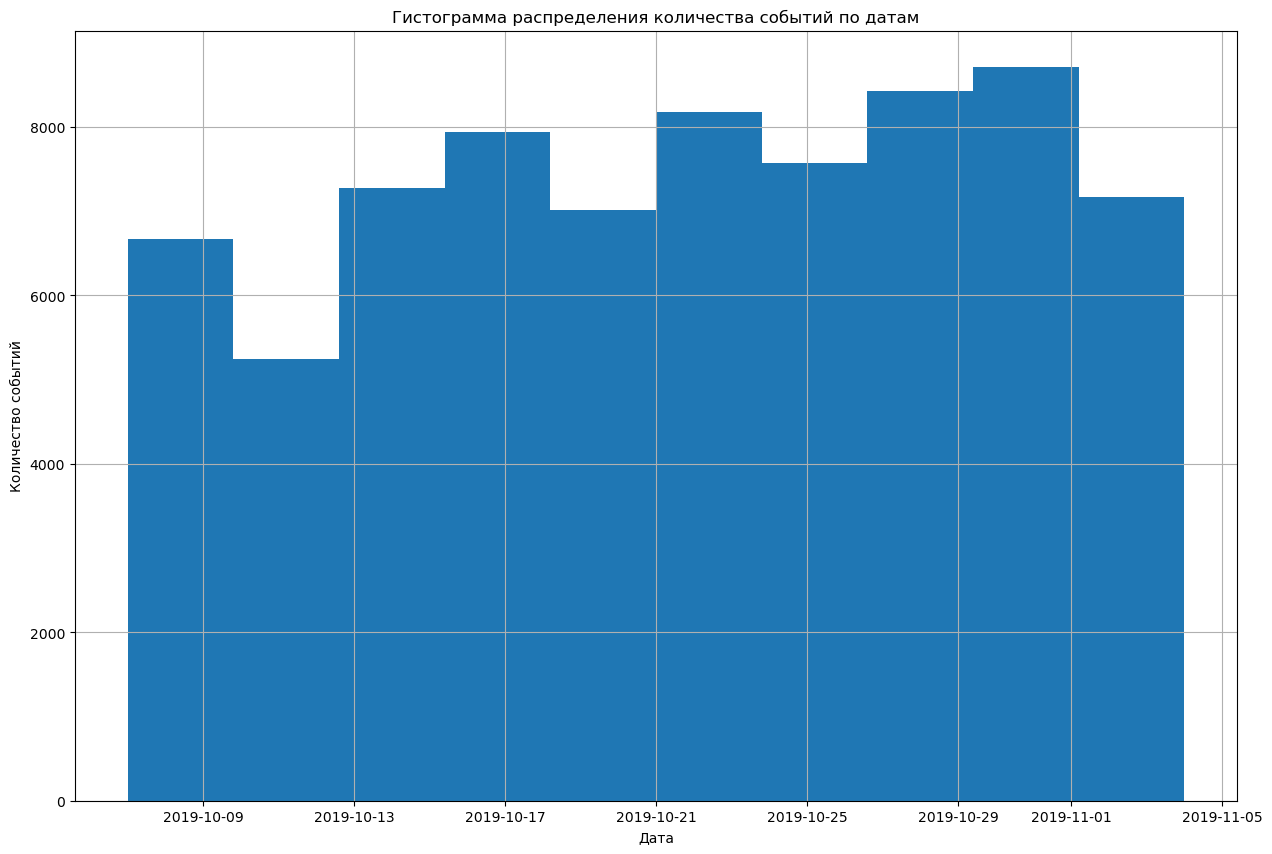

In [39]:
ax = mobile_dataset['event_time'].hist(figsize=(15, 10))

plt.title('Гистограмма распределения количества событий по датам')

# Добавляем подпись для оси X
ax.set_xlabel('Дата')

# Добавляем подпись для оси Y
ax.set_ylabel('Количество событий');

Как видно на графике за исследуемый период времени меньше всего пользователи использовали приложение в период с 2019-10-09 по 2019-10-13. А больше всего с 2019-10-29 по 2019-11-01.

#### Изучение целевого события.

Одним из ключевых вопросов исследования является: Какие события влияют на конверсию в целевое действие? В нашем случае целевым событием (ЦС) является show_contacts (показать контакты). 

Для подсчёта данного события воспользуемся срезом данных (query) и методом group by(). Запишем полученные результат в переменную target_show.

In [40]:
target_show = mobile_dataset.query('event_name == "show_contacts"').groupby('user_id')['event_name'].count().sort_values(ascending=False)
display(len(target_show))

981

981 пользователь совершил ЦС.

Посмотрим как часто пользователи совершают ЦС с помощью метода describe().

In [41]:
target_show.describe()

count    981.000000
mean       4.616718
std        9.621611
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max      137.000000
Name: event_name, dtype: float64

В среднем пользователь совершает ЦС - 4.61 раза. Для наглядности построим ящик с усами (boxplot) и посмотрим на выбросы.

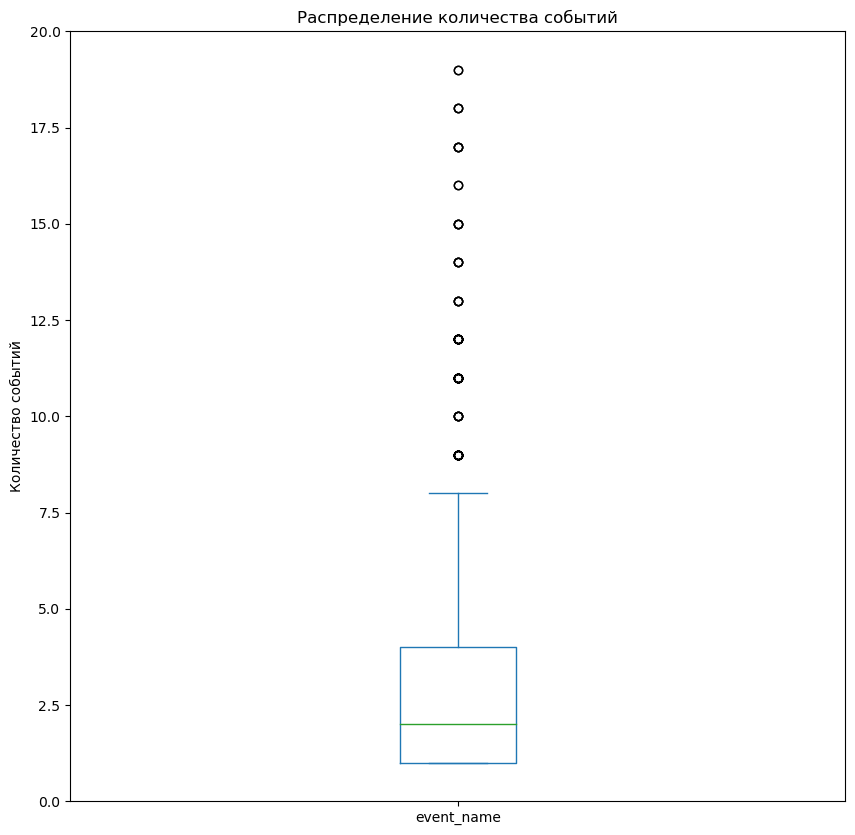

In [42]:
ax = target_show.plot.box(figsize=(10, 10))

plt.title('Распределение количества событий')

# Добавляем подпись для оси Y
ax.set_ylabel('Количество событий')
plt.ylim(0,20);
plt.show()

Добавим еще один boxplot, но на этот раз уменьшим масштаб, чтобы оценить максимальное значение выбросов и лучше посмотреть распределение аномальных значений. 

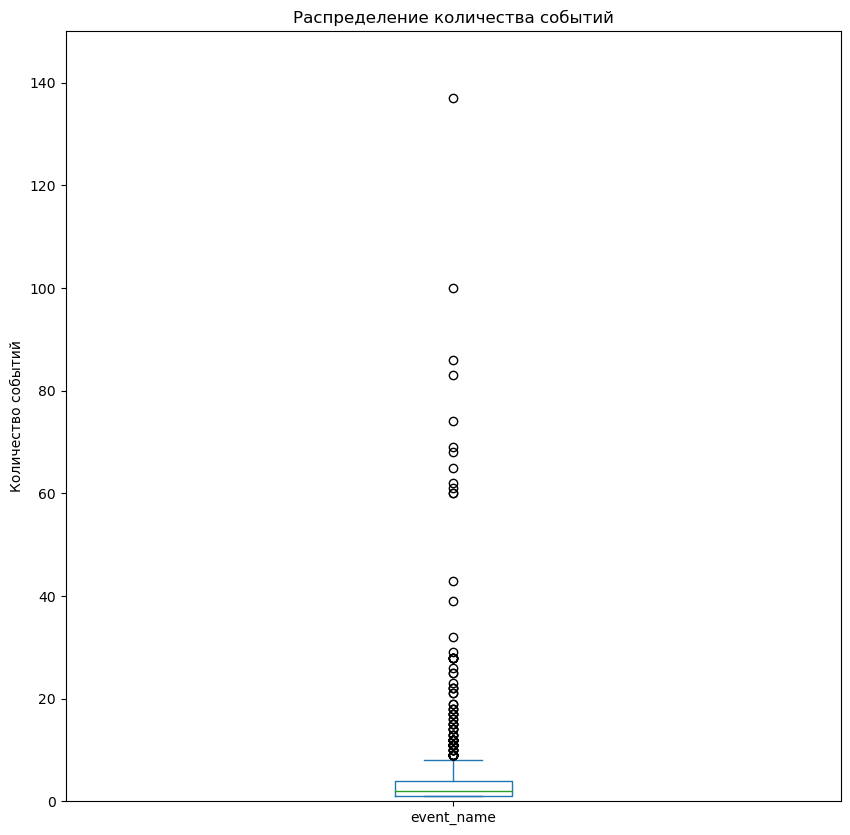

In [43]:
ax = target_show.plot.box(figsize=(10, 10))

plt.title('Распределение количества событий')

# Добавляем подпись для оси Y
ax.set_ylabel('Количество событий')
plt.ylim(0,150);
plt.show()

На графике мы наблюдаем распределение событий ЦС, которое совершили пользователи. Все что выше 5 целевых событий для пользователя можно считать аномалиями. Также у нас есть пользователь, который совершил ЦС - 140 раз. Можем предположить что есть люди, которые активно используют приложение для купли-продажи товаров и тем самым зарабатывают на этом. Следовательно, у таких пользователей количество ЦС будет выше чем у остальных. Также нельзя отрицать, тот факт, что данные могут быть ошибочными и в лог закралась ошибка и действия пользователей были посчитаны некорректно.

#### Расчёт конверсии в ЦС.

**Какие события влияют на конверсию в целевое действие?**

Для ответа на один из ключевых вопросов исследования, создадим отдельный датафрейм в который добавим данные о пользователях, которые хоть раз совершали ЦС (show_contacts).

In [44]:
mobile_dataset['event_name'].unique()

array(['advert_open', 'tips_show', 'map', 'show_contacts', 'search_4',
       'search_5', 'tips_click', 'photos_show', 'search_1', 'search_2',
       'search_3', 'favorites_add', 'contacts_call', 'search_6',
       'search_7'], dtype=object)

Для этого все поисковые запросы лучше объединить в один. Назовем его search_all. Воспользуемся методом replace и регулярным выражением. 

In [45]:
mobile_dataset['event_name'] = mobile_dataset['event_name'].str.replace('search_+\d', 'search_all')

In [46]:
mobile_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74197 entries, 0 to 74196
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
 3   source      74197 non-null  object        
 4   week        74197 non-null  int64         
 5   date        74197 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 4.0+ MB


In [47]:
mobile_dataset['event_name'].unique()

array(['advert_open', 'tips_show', 'map', 'show_contacts', 'search_all',
       'tips_click', 'photos_show', 'favorites_add', 'contacts_call'],
      dtype=object)

**Расчитаем конверсию для пользователей совершивших события advert_open -> show_contacts**

In [48]:
advert_open_users = mobile_dataset.query('event_name == "advert_open"')['user_id'].unique()
advert_open_users_1 = mobile_dataset.query('user_id in @advert_open_users')
advert_open_users_1 = advert_open_users_1.query('event_name == "show_contacts"')['user_id'].unique()
len(advert_open_users)

advert_open_conversion = (len(advert_open_users_1)/len(advert_open_users))*100
display(f"Конверсия для пользователей совершивших события advert_open -> show_contacts - {round(advert_open_conversion, 2)}%")

'Конверсия для пользователей совершивших события advert_open -> show_contacts - 18.38%'

**Расчитаем конверсию для пользователей совершивших события tips_show -> show_contacts**

In [49]:
tips_show_users = mobile_dataset.query('event_name == "tips_show"')['user_id'].unique()
tips_show_users_1 = mobile_dataset.query('user_id in @tips_show_users')
tips_show_users_1 = tips_show_users_1.query('event_name == "show_contacts"')['user_id'].unique()
len(tips_show_users)

tips_show_conversion = (len(tips_show_users_1)/len(tips_show_users))*100
display(f"Конверсия для пользователей совершивших события tips_show -> show_contacts - {round(tips_show_conversion, 2)}%")

'Конверсия для пользователей совершивших события tips_show -> show_contacts - 18.42%'

**Расчитаем конверсию для пользователей совершивших события map -> show_contacts**

In [50]:
map_users = mobile_dataset.query('event_name == "map"')['user_id'].unique()
map_users_1 = mobile_dataset.query('user_id in @map_users')
map_users_1 = map_users_1.query('event_name == "show_contacts"')['user_id'].unique()
len(map_users)

map_conversion = (len(map_users_1)/len(map_users))*100
display(f"Конверсия для пользователей совершивших события map -> show_contacts - {round(map_conversion, 2)}%")

'Конверсия для пользователей совершивших события map -> show_contacts - 19.85%'

**Расчитаем конверсию для пользователей совершивших события show_contacts -> show_contacts**

In [51]:
show_contacts_users = mobile_dataset.query('event_name == "show_contacts"')['user_id'].unique()
show_contacts_users_1 = mobile_dataset.query('user_id in @show_contacts_users')
show_contacts_users_1 = show_contacts_users_1.query('event_name == "show_contacts"')['user_id'].unique()
len(show_contacts_users)

show_contacts_conversion = (len(show_contacts_users_1)/len(show_contacts_users))*100
display(f"Конверсия для пользователей совершивших события show_contacts -> show_contacts - {round(show_contacts_conversion, 2)}%")

'Конверсия для пользователей совершивших события show_contacts -> show_contacts - 100.0%'

**Расчитаем конверсию для пользователей совершивших события search_all -> show_contacts**

In [52]:
search_all_users = mobile_dataset.query('event_name == "search_all"')['user_id'].unique()
search_all_users_1 = mobile_dataset.query('user_id in @search_all_users')
search_all_users_1 = search_all_users_1.query('event_name == "show_contacts"')['user_id'].unique()
len(search_all_users)

search_all_conversion = (len(search_all_users_1)/len(search_all_users))*100
display(f"Конверсия для пользователей совершивших события search_all -> show_contacts - {round(search_all_conversion, 2)}%")

'Конверсия для пользователей совершивших события search_all -> show_contacts - 22.63%'

**Расчитаем конверсию для пользователей совершивших события tips_click -> show_contacts**

In [53]:
tips_click_users = mobile_dataset.query('event_name == "tips_click"')['user_id'].unique()
tips_click_users_1 = mobile_dataset.query('user_id in @tips_click_users')
tips_click_users_1 = tips_click_users_1.query('event_name == "show_contacts"')['user_id'].unique()
len(tips_click_users)

tips_click_conversion = (len(tips_click_users_1)/len(tips_click_users))*100
display(f"Конверсия для пользователей совершивших события tips_click -> show_contacts - {round(tips_click_conversion, 2)}%")

'Конверсия для пользователей совершивших события tips_click -> show_contacts - 31.06%'

**Расчитаем конверсию для пользователей совершивших события photos_show -> show_contacts**

In [54]:
photos_show_users = mobile_dataset.query('event_name == "photos_show"')['user_id'].unique()
photos_show_users_1 = mobile_dataset.query('user_id in @photos_show_users')
photos_show_users_1 = photos_show_users_1.query('event_name == "show_contacts"')['user_id'].unique()
len(photos_show_users)

photos_show_conversion = (len(photos_show_users_1)/len(photos_show_users))*100
display(f"Конверсия для пользователей совершивших события photos_show -> show_contacts - {round(photos_show_conversion, 2)}%")

'Конверсия для пользователей совершивших события photos_show -> show_contacts - 30.96%'

**Расчитаем конверсию для пользователей совершивших события favorites_add -> show_contacts**

In [55]:
favorites_add_users = mobile_dataset.query('event_name == "favorites_add"')['user_id'].unique()
favorites_add_users_1 = mobile_dataset.query('user_id in @favorites_add_users')
favorites_add_users_1 = favorites_add_users_1.query('event_name == "show_contacts"')['user_id'].unique()
len(favorites_add_users)

favorites_add_conversion = (len(favorites_add_users_1)/len(favorites_add_users))*100
display(f"Конверсия для пользователей совершивших события favorites_add -> show_contacts - {round(favorites_add_conversion, 2)}%")

'Конверсия для пользователей совершивших события favorites_add -> show_contacts - 38.75%'

**Расчитаем конверсию для пользователей совершивших события contacts_call -> show_contacts**

In [56]:
contacts_call_users = mobile_dataset.query('event_name == "contacts_call"')['user_id'].unique()
contacts_call_users_1 = mobile_dataset.query('user_id in @contacts_call_users')
contacts_call_users_1 = contacts_call_users_1.query('event_name == "show_contacts"')['user_id'].unique()
len(contacts_call_users)

contacts_call_conversion = (len(contacts_call_users_1)/len(contacts_call_users))*100
display(f"Конверсия для пользователей совершивших события contacts_call -> show_contacts - {round(contacts_call_conversion, 2)}%")

'Конверсия для пользователей совершивших события contacts_call -> show_contacts - 100.0%'

Соберём полученные значения в отдельную таблицу.

In [57]:
conversion_table = {'event_name': ['tips_show', 'map', 'search_all', 'photos_show', 'favorites_add', 'show_contacts',
                                   'contacts_call', 'advert_open', 'tips_click']}

conversion_table = pd.DataFrame(conversion_table)


conversion_table['conversion'] = f"{round(tips_show_conversion, 2)}%"

conversion_table.at[1, 'conversion'] = f"{round(map_conversion, 2)}%"
conversion_table.at[2, 'conversion'] = f"{round(search_all_conversion, 2)}%"
conversion_table.at[3, 'conversion'] = f"{round(photos_show_conversion, 2)}%"
conversion_table.at[4, 'conversion'] = f"{round(favorites_add_conversion, 2)}%"
conversion_table.at[5, 'conversion'] = f"{round(show_contacts_conversion, 2)}%"
conversion_table.at[6, 'conversion'] = f"{round(contacts_call_conversion, 2)}%"
conversion_table.at[7, 'conversion'] = f"{round(advert_open_conversion, 2)}%"
conversion_table.at[8, 'conversion'] = f"{round(tips_click_conversion, 2)}%"

# выводим таблицу
display(conversion_table)

event_name conversion
0      tips_show     18.42%
1            map     19.85%
2     search_all     22.63%
3    photos_show     30.96%
4  favorites_add     38.75%
5  show_contacts     100.0%
6  contacts_call     100.0%
7    advert_open     18.38%
8     tips_click     31.06%

#### Сценарии поведения пользователей.

Для расчёта сценариев поведения пользователя необходимо сделать срез данных по ЦС.

In [58]:
show_contacts = mobile_dataset.query('event_name == "show_contacts"')
target_event = mobile_dataset[mobile_dataset.user_id.isin(show_contacts.user_id.unique())]
target_event.head()

event_time     event_name                               user_id  \
12 2019-10-07 00:02:07      tips_show  8c356c42-3ba9-4cb6-80b8-3f868d0192c3   
24 2019-10-07 00:05:16  show_contacts  8c356c42-3ba9-4cb6-80b8-3f868d0192c3   
28 2019-10-07 00:06:01      tips_show  8c356c42-3ba9-4cb6-80b8-3f868d0192c3   
32 2019-10-07 00:06:56      tips_show  8c356c42-3ba9-4cb6-80b8-3f868d0192c3   
35 2019-10-07 00:09:24      tips_show  8c356c42-3ba9-4cb6-80b8-3f868d0192c3   

    source  week        date  
12  yandex    41  2019-10-07  
24  yandex    41  2019-10-07  
28  yandex    41  2019-10-07  
32  yandex    41  2019-10-07  
35  yandex    41  2019-10-07

Параметр deep в методе query отвечает за глубину вложенности результатов поиска. Если deep установлен в True, то поиск будет выполнен рекурсивно во всех вложенных элементах, иначе результаты будут выданы только для первого уровня вложенности. Установим параметр deep=True.

In [59]:
show_contacts_copy = target_event.query('event_name == "show_contacts"').copy(deep=True)

Переименуем столбец event_name на target_event.

In [60]:
show_contacts_copy.rename(columns={'event_name':'target_event'}, inplace=True)
show_contacts_copy.sample()

event_time   target_event  \
20996 2019-10-15 20:37:24  show_contacts   

                                    user_id  source  week        date  
20996  271cfca1-2f2e-4456-9cf8-bb5b34f27a5c  google    42  2019-10-15

Напишем функцию, которая будет определять какое событие пользователь совершил до ЦС(show_contacts). Функция будет определять и возвращать название события, которое произошло с пользователем до наступления события show_contacts. В качестве аргументов функция будет принимать id пользователя и время события.

In [61]:
def previous_event(user_id, event_time):
    x = target_event.query(f'user_id == "{user_id}" and event_time < "{event_time}"').sort_values(by='event_time', ascending=False)
    if x.size == 0:
        return 'unknown'
    return x['event_name'].iloc[0]

Теперь применим данную функцию к нашему датасету show_contacts_copy. Результат запишем в столбец previous_event_name.

In [62]:
show_contacts_copy['previous_event_name'] = show_contacts_copy.apply(lambda x: previous_event(x['user_id'],
                                                                                                   x['event_time']),
                                                                          axis=1)

Теперь сгруппируем датафрейм show_contacts_copy по столбцу previous_event_name и посчитаем сколько раз пользователь столкнулся с определенным событием.

In [63]:
previous_events_count = show_contacts_copy.groupby('previous_event_name')['previous_event_name'].count()
previous_events_count = previous_events_count.to_frame()
previous_events_count.columns = ['events_count']
previous_events_count = previous_events_count.reset_index()
previous_events_count

previous_event_name  events_count
0         advert_open            77
1       contacts_call           203
2       favorites_add            45
3                 map            67
4         photos_show           414
5          search_all           238
6       show_contacts          1412
7          tips_click            13
8           tips_show          1879
9             unknown           181

Для визуализации событий которые влияют на наступление ЦС, можно использовать диаграмму Сенкея. Данный метод  визуализации интегрирован в библиотеку plotly express.

Создадим функцию для визуализации полученных данных. 

In [64]:
user_event = [] 
source_app = [] 
number_events = []

for index, row in previous_events_count.iterrows():
    user_event.append(row['previous_event_name'])
    if (row['previous_event_name'] == 'show_contacts'):
        continue
    source_app.append(index)
    number_events.append(row['events_count'])
    
users_event_target = [user_event.index('show_contacts')] * (len(user_event) - 1)

Построим диаграмму Сенкея.

In [65]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = 'black', width = 0.5),
      label = user_event,
      color = 'green'
    ),
    link = dict(
      source = source_app,
      target = users_event_target, 
      value = number_events
  ))])

fig.update_layout(title_text='События влияющие на наступление ЦС')
fig.show()

**Можно выделить самые распространненые события, которые совершают пользователи до ЦС (show_contacts):**

1) tips_show (увидел рекомендованные объявления)  
2) photos_show (просмотр фотографий в объявлении)  

Эти два события являются самыми значимыми для наступления ЦС.

Также можно выделить наимение значимые события:
1) tips_click (кликнул по по рекомендованному объявлению)  
2) favorites_add (добавление объявления в избранное)  
3) map (открыл карту размещенных объявлений)

#### Воронка событий.

Посмотрим еще раз на события с которыми столкнулись пользователи при использовании приложения с помощью метода value_counts()

In [66]:
mobile_dataset['event_name'].value_counts()

tips_show        40055
photos_show      10012
search_all        6784
advert_open       6164
show_contacts     4529
map               3881
favorites_add     1417
tips_click         814
contacts_call      541
Name: event_name, dtype: int64

Для начала посмотрим на общий уровень конверсии. Для этого посчитаем все события кроме ЦС. 

In [67]:
all_conversion_users = mobile_dataset.query('event_name != "show_contacts"')['user_id'].unique()
all_conversion_users_1 = mobile_dataset.query('user_id in @all_conversion_users')
all_conversion_users_1 = all_conversion_users_1.query('event_name == "show_contacts"')['user_id'].unique()
len(all_conversion_users)

all_conversion_show_contacts = (len(all_conversion_users_1)/len(all_conversion_users))*100
display(f"Общая конверсия в событие show_contacts - {round(all_conversion_show_contacts, 2)}%")

'Общая конверсия в событие show_contacts - 22.25%'

Построим воронки для самых распространненых событий: 
1) tips_show (увидел рекомендованные объявления)  
2) photos_show (просмотр фотографий в объявлении)  

**Построение воронки для событий tips_show -> show_contacts**

In [68]:
funnel_data = mobile_dataset.loc[mobile_dataset['event_name'].isin(['tips_show', 'show_contacts'])]
funnel_data = funnel_data.groupby('user_id', as_index=False).agg({'event_name': pd.Series.nunique})
funnel_data = funnel_data.rename(columns={'event_name': 'step'})

In [69]:
steps = ['tips_show', 'show_contacts']
funnel_counts = []

for i in range(len(steps)):
    if i == 0:
        count = funnel_data.loc[funnel_data['step'] == 1, 'user_id'].nunique()
    else:
        count = funnel_data.loc[funnel_data['step'] == i+1, 'user_id'].nunique()
    
    funnel_counts.append(count)

In [70]:
fig = go.Figure(go.Funnel(
    y=steps,
    x=funnel_counts,
    textinfo="value+percent previous",
    marker={"color": ["#6b5b95", "#feb236", "#d64161"]}
))

fig.show()

**Построение воронки для событий photos_show -> show_contacts**

In [71]:
funnel_data = mobile_dataset.loc[mobile_dataset['event_name'].isin(['photos_show', 'show_contacts'])]
funnel_data = funnel_data.groupby('user_id', as_index=False).agg({'event_name': pd.Series.nunique})
funnel_data = funnel_data.rename(columns={'event_name': 'step'})

In [72]:
steps = ['photos_show', 'show_contacts']
funnel_counts = []

for i in range(len(steps)):
    if i == 0:
        count = funnel_data.loc[funnel_data['step'] == 1, 'user_id'].nunique()
    else:
        count = funnel_data.loc[funnel_data['step'] == i+1, 'user_id'].nunique()
    
    funnel_counts.append(count)

In [73]:
fig = go.Figure(go.Funnel(
    y=steps,
    x=funnel_counts,
    textinfo="value+percent previous",
    marker={"color": ["#6b5b95", "#feb236", "#d64161"]}
))

fig.show()

#### Расчёт времени между событиями пользователя.

Следующий ключевой вопрос на который необходимо ответить: Как различается время между распространенными событиями пользователя?

Для ответа на данный вопрос необходимо создать таблицу пользователей, в которой будут содержатся дата и время первого события и целевого события. Один пользователь мог совершать несколько целевых событий.

In [74]:
mobile_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74197 entries, 0 to 74196
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
 3   source      74197 non-null  object        
 4   week        74197 non-null  int64         
 5   date        74197 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 4.0+ MB


In [75]:
time_show = mobile_dataset.query('event_name == "show_contacts"').groupby('user_id')['event_time'].min().reset_index()
time_show.columns = ['user_id', 'time_show_first_event']
time_show

user_id time_show_first_event
0    00157779-810c-4498-9e05-a1e9e3cedf93   2019-10-20 19:17:18
1    00551e79-152e-4441-9cf7-565d7eb04090   2019-10-25 16:44:41
2    005fbea5-2678-406f-88a6-fbe9787e2268   2019-10-11 11:22:54
3    00753c79-ea81-4456-acd0-a47a23ca2fb9   2019-10-20 14:57:06
4    007d031d-5018-4e02-b7ee-72a30609173f   2019-10-22 13:08:09
..                                    ...                   ...
976  fee3ba1c-16f4-46f7-bf56-4bf80cc4e2f5   2019-10-26 12:13:19
977  ff1554b5-919e-40b1-90bb-ee1f7f6d5846   2019-10-21 10:59:23
978  ffc01466-fdb1-4460-ae94-e800f52eb136   2019-10-07 20:33:42
979  ffe68f10-e48e-470e-be9b-eeb93128ff1a   2019-10-22 16:07:17
980  fffb9e79-b927-4dbb-9b48-7fd09b23a62b   2019-10-16 12:57:40

[981 rows x 2 columns]

In [76]:
user_id_first_event = mobile_dataset.groupby('user_id')['event_time'].min().reset_index()

In [77]:
mobile_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74197 entries, 0 to 74196
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
 3   source      74197 non-null  object        
 4   week        74197 non-null  int64         
 5   date        74197 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 4.0+ MB


Напишем функцию, которая создаст столбец с названием первого события.

In [78]:
def first_event(row):
    l = (mobile_dataset.loc[(mobile_dataset['user_id']==row['user_id']) & (mobile_dataset['event_time']==row['event_time']),'event_name']).values 
    return l[0]
    
user_id_first_event['first_event'] = user_id_first_event.apply(first_event, axis=1)
user_id_first_event

user_id          event_time    first_event
0     0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 13:39:45      tips_show
1     00157779-810c-4498-9e05-a1e9e3cedf93 2019-10-19 21:34:33     search_all
2     00463033-5717-4bf1-91b4-09183923b9df 2019-11-01 13:54:35    photos_show
3     004690c3-5a84-4bb7-a8af-e0c8f8fca64e 2019-10-18 22:14:05     search_all
4     00551e79-152e-4441-9cf7-565d7eb04090 2019-10-25 16:44:41  show_contacts
...                                    ...                 ...            ...
4288  ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07 2019-10-13 16:11:27            map
4289  ffc01466-fdb1-4460-ae94-e800f52eb136 2019-10-07 20:32:49    photos_show
4290  ffcf50d9-293c-4254-8243-4890b030b238 2019-10-23 11:51:35      tips_show
4291  ffe68f10-e48e-470e-be9b-eeb93128ff1a 2019-10-21 16:39:33     search_all
4292  fffb9e79-b927-4dbb-9b48-7fd09b23a62b 2019-10-12 00:57:21      tips_show

[4293 rows x 3 columns]

Всего в нашем датасете 4293 уникальных пользователя из которых 981 совершил уникальное событие. 

In [79]:
users_table_action = time_show.merge(user_id_first_event, on='user_id', how='left')
users_table_action.columns = ['user_id', 'show_contacts_first_event', 'time_of_first_event', 'first_event_name']
users_table_action['time_difference'] = users_table_action['show_contacts_first_event'] - users_table_action['time_of_first_event']
users_table_action                                                                                                        

user_id show_contacts_first_event  \
0    00157779-810c-4498-9e05-a1e9e3cedf93       2019-10-20 19:17:18   
1    00551e79-152e-4441-9cf7-565d7eb04090       2019-10-25 16:44:41   
2    005fbea5-2678-406f-88a6-fbe9787e2268       2019-10-11 11:22:54   
3    00753c79-ea81-4456-acd0-a47a23ca2fb9       2019-10-20 14:57:06   
4    007d031d-5018-4e02-b7ee-72a30609173f       2019-10-22 13:08:09   
..                                    ...                       ...   
976  fee3ba1c-16f4-46f7-bf56-4bf80cc4e2f5       2019-10-26 12:13:19   
977  ff1554b5-919e-40b1-90bb-ee1f7f6d5846       2019-10-21 10:59:23   
978  ffc01466-fdb1-4460-ae94-e800f52eb136       2019-10-07 20:33:42   
979  ffe68f10-e48e-470e-be9b-eeb93128ff1a       2019-10-22 16:07:17   
980  fffb9e79-b927-4dbb-9b48-7fd09b23a62b       2019-10-16 12:57:40   

    time_of_first_event first_event_name time_difference  
0   2019-10-19 21:34:33       search_all 0 days 21:42:45  
1   2019-10-25 16:44:41    show_contacts 0 days 00:00:00  
2   2019-10-11 11:22:54    show_contacts 0 days 00:00:00  
3   2019-10-20 14:57:06    show_contacts 0 days 00:00:00  
4   2019-10-22 13:02:26              map 0 days 00:05:43  
..                  ...              ...             ...  
976 2019-10-26 11:43:11       search_all 0 days 00:30:08  
977 2019-10-21 08:28:33      photos_show 0 days 02:30:50  
978 2019-10-07 20:32:49      photos_show 0 days 00:00:53  
979 2019-10-21 16:39:33       search_all 0 days 23:27:44  
980 2019-10-12 00:57:21        tips_show 4 days 12:00:19  

[981 rows x 5 columns]

In [80]:
users_table_action.sort_values(by='time_difference')

user_id show_contacts_first_event  \
302  4e62e09e-ef99-4c52-b8f6-ec50b42f6d56       2019-10-16 12:53:01   
480  7f38ea5d-ad7c-4e8a-b1e1-c63da89a4c4c       2019-10-16 17:07:15   
198  2fb6515e-a902-4329-8080-749bcf4f8053       2019-10-31 00:35:18   
200  30a6b55e-a72a-40bc-bbb9-7cc28a2e0b3e       2019-10-11 14:03:59   
474  7cc38f4c-7d5e-4dd4-a246-ef1ee2187da5       2019-10-19 15:18:30   
..                                    ...                       ...   
737  c21daf1f-e787-4a5c-9d92-62cd3dafc9b3       2019-10-25 15:38:49   
958  f9c19253-73e7-4b9e-9630-45353a792248       2019-11-03 11:39:32   
455  771c9e69-4c82-4e02-a862-d56b40a29838       2019-11-02 18:03:57   
782  cbfbc3ed-2ca7-468e-9d1e-3c321f35dcc9       2019-11-03 22:38:17   
41   08ff0fce-e12b-4f7e-8680-34e105f7f537       2019-11-03 13:34:38   

    time_of_first_event first_event_name  time_difference  
302 2019-10-16 12:53:01    show_contacts  0 days 00:00:00  
480 2019-10-16 17:07:15    show_contacts  0 days 00:00:00  
198 2019-10-31 00:35:18    show_contacts  0 days 00:00:00  
200 2019-10-11 14:03:59    show_contacts  0 days 00:00:00  
474 2019-10-19 15:18:30    show_contacts  0 days 00:00:00  
..                  ...              ...              ...  
737 2019-10-07 14:32:55      photos_show 18 days 01:05:54  
958 2019-10-14 09:09:14      photos_show 20 days 02:30:18  
455 2019-10-11 12:25:56      photos_show 22 days 05:38:01  
782 2019-10-12 16:18:29       search_all 22 days 06:19:48  
41  2019-10-11 09:14:00      photos_show 23 days 04:20:38  

[981 rows x 5 columns]

Посчитаем количество ЦС там где для пользователей это является первым событием. 

In [81]:
users_table_action.query('time_difference =="0 days 00:00:00"')['first_event_name'].value_counts()

show_contacts    179
Name: first_event_name, dtype: int64

179 пользователей в нашем датасете сразу выполнили целевое событие, однако посмотреть контакты пользователь не может без основого события - advert_open (открыл карточку объявления)

Следовательно в нашем датасете часть пользователей - 179 человек осуществили это действие ранее попадания в выборку. Чтобы не искажать результаты исследования необходимо исключить данных пользователей и посмотреть на полученный результат.

In [82]:
users_table_action = users_table_action.query('time_difference !="0 days 00:00:00"').reset_index(drop=True)
users_table_action

user_id show_contacts_first_event  \
0    00157779-810c-4498-9e05-a1e9e3cedf93       2019-10-20 19:17:18   
1    007d031d-5018-4e02-b7ee-72a30609173f       2019-10-22 13:08:09   
2    0103a07d-513f-42b9-8d91-d5891d5655fe       2019-11-03 18:50:04   
3    01556e76-d389-43bd-9fc7-1a3ba9802f49       2019-10-10 16:09:38   
4    01585246-7d9b-4e03-a465-095d5b891b0a       2019-10-17 16:21:56   
..                                    ...                       ...   
797  fee3ba1c-16f4-46f7-bf56-4bf80cc4e2f5       2019-10-26 12:13:19   
798  ff1554b5-919e-40b1-90bb-ee1f7f6d5846       2019-10-21 10:59:23   
799  ffc01466-fdb1-4460-ae94-e800f52eb136       2019-10-07 20:33:42   
800  ffe68f10-e48e-470e-be9b-eeb93128ff1a       2019-10-22 16:07:17   
801  fffb9e79-b927-4dbb-9b48-7fd09b23a62b       2019-10-16 12:57:40   

    time_of_first_event first_event_name time_difference  
0   2019-10-19 21:34:33       search_all 0 days 21:42:45  
1   2019-10-22 13:02:26              map 0 days 00:05:43  
2   2019-11-03 18:42:59        tips_show 0 days 00:07:05  
3   2019-10-10 16:09:12      photos_show 0 days 00:00:26  
4   2019-10-17 16:20:58       search_all 0 days 00:00:58  
..                  ...              ...             ...  
797 2019-10-26 11:43:11       search_all 0 days 00:30:08  
798 2019-10-21 08:28:33      photos_show 0 days 02:30:50  
799 2019-10-07 20:32:49      photos_show 0 days 00:00:53  
800 2019-10-21 16:39:33       search_all 0 days 23:27:44  
801 2019-10-12 00:57:21        tips_show 4 days 12:00:19  

[802 rows x 5 columns]

In [83]:
events_without_start = users_table_action.query('time_difference !="0 days 00:00:00"').reset_index(drop=True)
events_without_start

user_id show_contacts_first_event  \
0    00157779-810c-4498-9e05-a1e9e3cedf93       2019-10-20 19:17:18   
1    007d031d-5018-4e02-b7ee-72a30609173f       2019-10-22 13:08:09   
2    0103a07d-513f-42b9-8d91-d5891d5655fe       2019-11-03 18:50:04   
3    01556e76-d389-43bd-9fc7-1a3ba9802f49       2019-10-10 16:09:38   
4    01585246-7d9b-4e03-a465-095d5b891b0a       2019-10-17 16:21:56   
..                                    ...                       ...   
797  fee3ba1c-16f4-46f7-bf56-4bf80cc4e2f5       2019-10-26 12:13:19   
798  ff1554b5-919e-40b1-90bb-ee1f7f6d5846       2019-10-21 10:59:23   
799  ffc01466-fdb1-4460-ae94-e800f52eb136       2019-10-07 20:33:42   
800  ffe68f10-e48e-470e-be9b-eeb93128ff1a       2019-10-22 16:07:17   
801  fffb9e79-b927-4dbb-9b48-7fd09b23a62b       2019-10-16 12:57:40   

    time_of_first_event first_event_name time_difference  
0   2019-10-19 21:34:33       search_all 0 days 21:42:45  
1   2019-10-22 13:02:26              map 0 days 00:05:43  
2   2019-11-03 18:42:59        tips_show 0 days 00:07:05  
3   2019-10-10 16:09:12      photos_show 0 days 00:00:26  
4   2019-10-17 16:20:58       search_all 0 days 00:00:58  
..                  ...              ...             ...  
797 2019-10-26 11:43:11       search_all 0 days 00:30:08  
798 2019-10-21 08:28:33      photos_show 0 days 02:30:50  
799 2019-10-07 20:32:49      photos_show 0 days 00:00:53  
800 2019-10-21 16:39:33       search_all 0 days 23:27:44  
801 2019-10-12 00:57:21        tips_show 4 days 12:00:19  

[802 rows x 5 columns]

Теперь расчитаем среднее и медианное время до наступления ЦС.

In [84]:
print(f"Среднее время {events_without_start['time_difference'].mean()}")
print(f"Медианное время {events_without_start['time_difference'].median()}")

Среднее время 1 days 12:00:42.987531172
Медианное время 0 days 00:22:53.500000


Разница между средним и медианным временем значительная

Отобразим полученные данные на гистограмме. Для этого необходимо перевести время в минуты с помощью метода dt.total_seconds().

In [85]:
minutes = round(events_without_start['time_difference'].dt.total_seconds()/60, 1)
minutes

0      1302.8
1         5.7
2         7.1
3         0.4
4         1.0
        ...  
797      30.1
798     150.8
799       0.9
800    1407.7
801    6480.3
Name: time_difference, Length: 802, dtype: float64

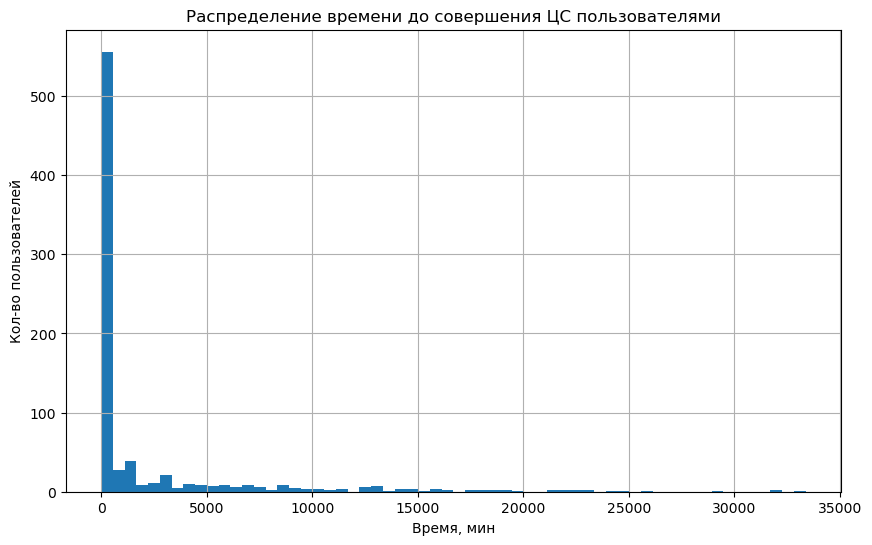

In [86]:
minutes.hist(figsize=(10,6),bins=60)
plt.title('Распределение времени до совершения ЦС пользователями')
plt.ylabel('Кол-во пользователей')
plt.xlabel('Время, мин');
plt.show()

Уменьшим диапазон времени проведенного в приложении до 1000 минут.

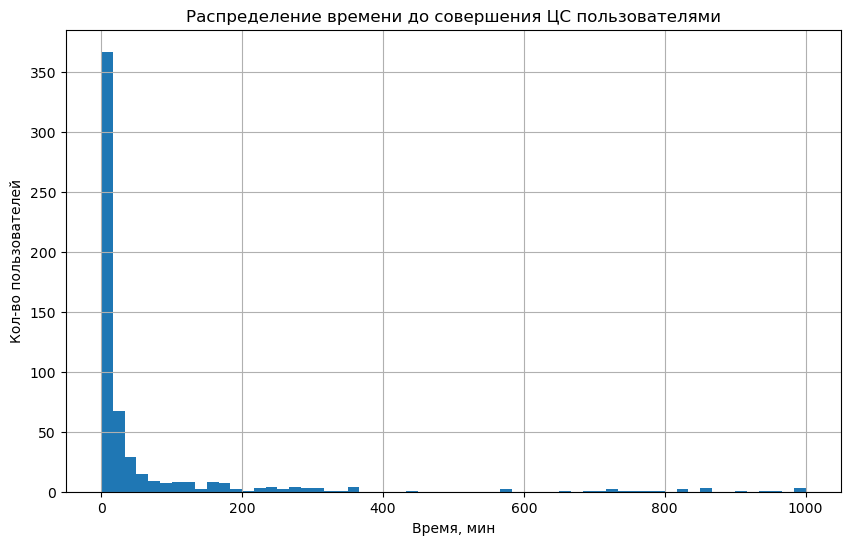

In [87]:
minutes.hist(figsize=(10,6),bins=60, range=(0,1000))
plt.title('Распределение времени до совершения ЦС пользователями')
plt.ylabel('Кол-во пользователей')
plt.xlabel('Время, мин');
plt.show()

Как видно на гистограмме у большинства пользователей время до целевого события укладывается в 200 минут.

Построим ящик с усами и посмотрим на выбросы в данных.

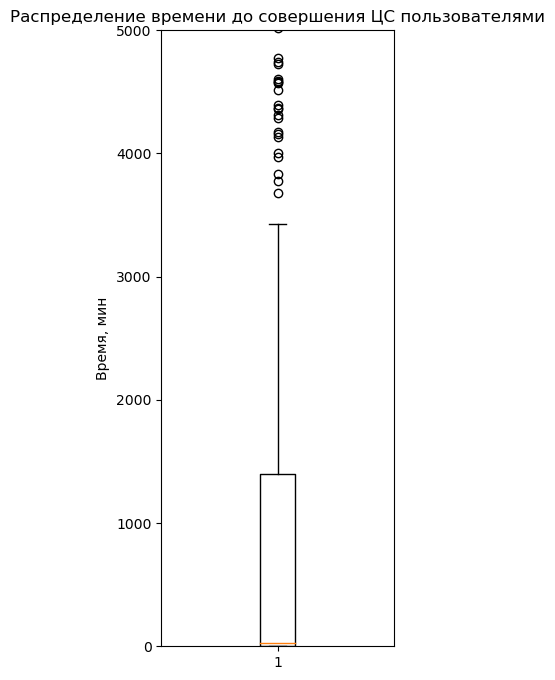

In [88]:
plt.figure(figsize=(3,8))
plt.title('Распределение времени до совершения ЦС пользователями')
plt.ylabel('Время, мин');
plt.boxplot(minutes)
plt.ylim(0,5000);

Основная часть выбросов - это пользователи у которых до совершения ЦС прошло более 3500 минут в приложении. Основная масса тратит до наступления ЦС до 1500 минут.

#### Расчёт количества времени проведенного в приложении пользователями.

Теперь посчитаем сколько времени пользователи проводят в приложении. В нашем датасете отсутствует информация о времени начала и конце сессии пользователя. В таком случае, нужно самостоятельно определить пользовательскую сессию.

##### Выделение пользовательской сессии.

Для удобства примем пользовательскую сессию равную одному дню, используя столбец date и метод ngroup().

Для начала отсортируем данные в датасете по столбцам user_id и event_time.

In [89]:
mobile_dataset = mobile_dataset.sort_values(['user_id', 'event_time']).reset_index(drop=True)

In [90]:
mobile_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
 3   source      74197 non-null  object        
 4   week        74197 non-null  int64         
 5   date        74197 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 3.4+ MB


Используем метод ngroup() для расчёта сессий пользователей. 

In [91]:
mobile_dataset['session_id'] = mobile_dataset.groupby(['user_id', 'date']).ngroup()
mobile_dataset

event_time     event_name  \
0     2019-10-07 13:39:45      tips_show   
1     2019-10-07 13:40:31      tips_show   
2     2019-10-07 13:41:05      tips_show   
3     2019-10-07 13:43:20      tips_show   
4     2019-10-07 13:45:30      tips_show   
...                   ...            ...   
74192 2019-11-03 15:51:23      tips_show   
74193 2019-11-03 15:51:57  show_contacts   
74194 2019-11-03 16:07:40      tips_show   
74195 2019-11-03 16:08:18      tips_show   
74196 2019-11-03 16:08:25      tips_show   

                                    user_id  source  week        date  \
0      0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other    41  2019-10-07   
1      0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other    41  2019-10-07   
2      0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other    41  2019-10-07   
3      0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other    41  2019-10-07   
4      0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other    41  2019-10-07   
...                                     ...     ...   ...         ...   
74192  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google    44  2019-11-03   
74193  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google    44  2019-11-03   
74194  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google    44  2019-11-03   
74195  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google    44  2019-11-03   
74196  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google    44  2019-11-03   

       session_id  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
74192        7816  
74193        7816  
74194        7816  
74195        7816  
74196        7816  

[74197 rows x 7 columns]

Получилось 7816 сессий. 

Воспользуемся группировкой и агрегацией для расчёта времени начала и окончания пользовательских сессий с учётом session_id.

In [92]:
session_times = mobile_dataset.groupby(['user_id', 'session_id'])['event_time'].agg(['min', 'max'])
session_times = session_times.rename(columns={'min': 'session_start_time', 'max': 'session_end_time'})
session_times

session_start_time  \
user_id                              session_id                       
0001b1d5-b74a-4cbf-aeb0-7df5947bf349 0          2019-10-07 13:39:45   
                                     1          2019-10-09 18:33:55   
                                     2          2019-10-21 19:52:30   
                                     3          2019-10-22 11:18:14   
00157779-810c-4498-9e05-a1e9e3cedf93 4          2019-10-19 21:34:33   
...                                                             ...   
fffb9e79-b927-4dbb-9b48-7fd09b23a62b 7812       2019-10-29 13:58:47   
                                     7813       2019-10-30 00:15:43   
                                     7814       2019-11-01 00:24:31   
                                     7815       2019-11-02 01:16:48   
                                     7816       2019-11-03 14:32:55   

                                                   session_end_time  
user_id                              session_id                      
0001b1d5-b74a-4cbf-aeb0-7df5947bf349 0          2019-10-07 13:49:41  
                                     1          2019-10-09 18:42:22  
                                     2          2019-10-21 20:07:30  
                                     3          2019-10-22 11:30:52  
00157779-810c-4498-9e05-a1e9e3cedf93 4          2019-10-19 21:59:54  
...                                                             ...  
fffb9e79-b927-4dbb-9b48-7fd09b23a62b 7812       2019-10-29 16:13:00  
                                     7813       2019-10-30 11:31:45  
                                     7814       2019-11-01 00:24:53  
                                     7815       2019-11-02 19:30:50  
                                     7816       2019-11-03 16:08:25  

[7817 rows x 2 columns]

Используя полученную информацию можем рассчитать сколько времени проводят пользователи в приложении.

In [93]:
session_times['time_in_app'] = session_times['session_end_time'] - session_times['session_start_time']
session_times

session_start_time  \
user_id                              session_id                       
0001b1d5-b74a-4cbf-aeb0-7df5947bf349 0          2019-10-07 13:39:45   
                                     1          2019-10-09 18:33:55   
                                     2          2019-10-21 19:52:30   
                                     3          2019-10-22 11:18:14   
00157779-810c-4498-9e05-a1e9e3cedf93 4          2019-10-19 21:34:33   
...                                                             ...   
fffb9e79-b927-4dbb-9b48-7fd09b23a62b 7812       2019-10-29 13:58:47   
                                     7813       2019-10-30 00:15:43   
                                     7814       2019-11-01 00:24:31   
                                     7815       2019-11-02 01:16:48   
                                     7816       2019-11-03 14:32:55   

                                                   session_end_time  \
user_id                              session_id                       
0001b1d5-b74a-4cbf-aeb0-7df5947bf349 0          2019-10-07 13:49:41   
                                     1          2019-10-09 18:42:22   
                                     2          2019-10-21 20:07:30   
                                     3          2019-10-22 11:30:52   
00157779-810c-4498-9e05-a1e9e3cedf93 4          2019-10-19 21:59:54   
...                                                             ...   
fffb9e79-b927-4dbb-9b48-7fd09b23a62b 7812       2019-10-29 16:13:00   
                                     7813       2019-10-30 11:31:45   
                                     7814       2019-11-01 00:24:53   
                                     7815       2019-11-02 19:30:50   
                                     7816       2019-11-03 16:08:25   

                                                    time_in_app  
user_id                              session_id                  
0001b1d5-b74a-4cbf-aeb0-7df5947bf349 0          0 days 00:09:56  
                                     1          0 days 00:08:27  
                                     2          0 days 00:15:00  
                                     3          0 days 00:12:38  
00157779-810c-4498-9e05-a1e9e3cedf93 4          0 days 00:25:21  
...                                                         ...  
fffb9e79-b927-4dbb-9b48-7fd09b23a62b 7812       0 days 02:14:13  
                                     7813       0 days 11:16:02  
                                     7814       0 days 00:00:22  
                                     7815       0 days 18:14:02  
                                     7816       0 days 01:35:30  

[7817 rows x 3 columns]

Воспользуемся методом describe() и посмотрим на время которое пользователи тратят в приложении.

In [94]:
session_times['time_in_app'].describe()

count                         7817
mean     0 days 01:23:02.005117052
std      0 days 03:10:10.086282725
min                0 days 00:00:00
25%                0 days 00:02:28
50%                0 days 00:11:48
75%                0 days 00:48:45
max                0 days 23:37:28
Name: time_in_app, dtype: object

Минимальное время - 0 days 00:00:00 (вероятно пользователь скачал приложение, установил но не запускал). Максимальное время - 0 days 23:37:28 (почти сутки). Среднее время составляет 0 days 01:23:02 (почти полтора часа). Посмотрим на медианное время методом median().

In [95]:
session_times['time_in_app'].median()

Timedelta('0 days 00:11:48')

Медианное время пользовательской сессии - 11 минут и 48 секунд. Большинству людей наверняка будет достаточно этого времени для поиска интересующего товара и добавления интересных объявлений в избранное. 

Отобразим полученные данные на гистограмме. Для этого необходимо перевести время в минуты с помощью метода dt.total_seconds().

In [96]:
minutes_in_app = round(session_times['time_in_app'].dt.total_seconds()/60, 1)

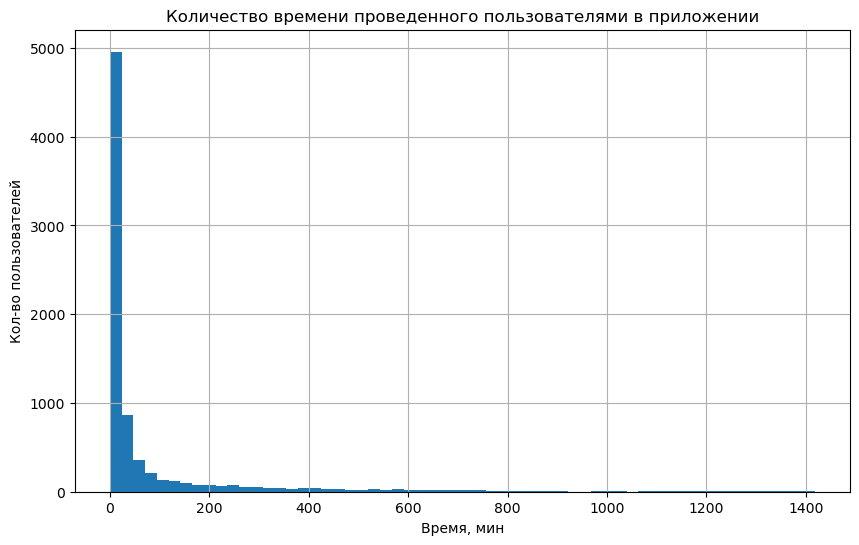

In [97]:
minutes_in_app.hist(figsize=(10,6),bins=60)
plt.title('Количество времени проведенного пользователями в приложении')
plt.ylabel('Кол-во пользователей')
plt.xlabel('Время, мин');
plt.show()

Уменьшим диапазон до 500 минут. 

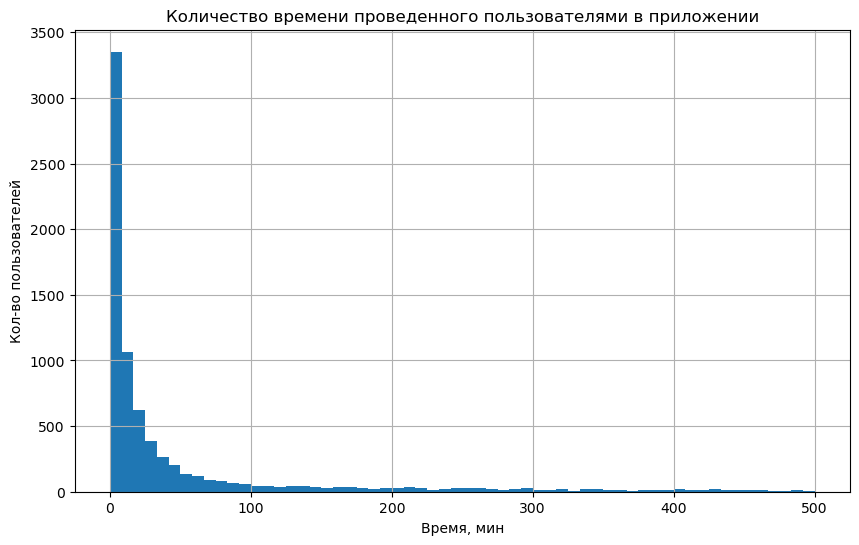

In [98]:
minutes_in_app.hist(figsize=(10,6),bins=60, range=(0,500))
plt.title('Количество времени проведенного пользователями в приложении')
plt.ylabel('Кол-во пользователей')
plt.xlabel('Время, мин');
plt.show()

Еще уменьшим диапазон до 100 минут.

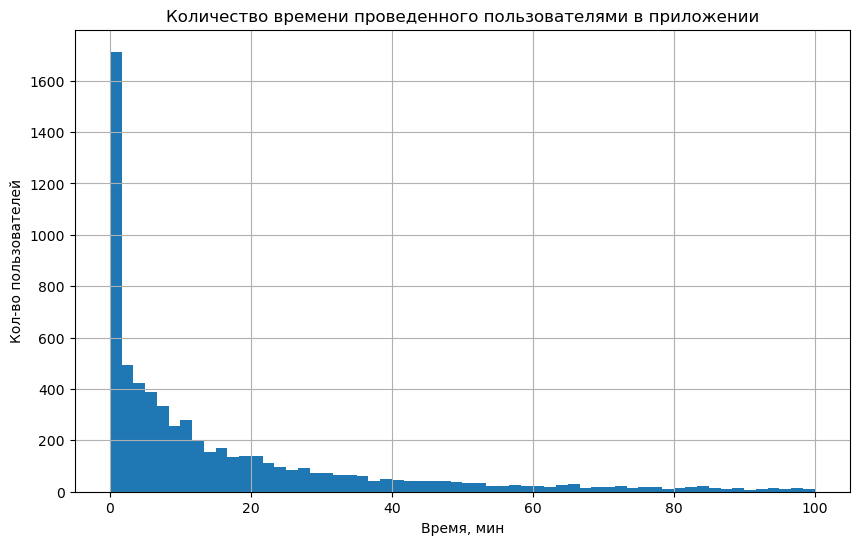

In [99]:
minutes_in_app.hist(figsize=(10,6),bins=60, range=(0,100))
plt.title('Количество времени проведенного пользователями в приложении')
plt.ylabel('Кол-во пользователей')
plt.xlabel('Время, мин');
plt.show()

Как видно на гистограмме у большинства пользователей время нахождения в приложении около 5-7 минут. Построим ящик с усами и посмотрим на распределение и возможные выбросы, используем диапазон в 100 минут.

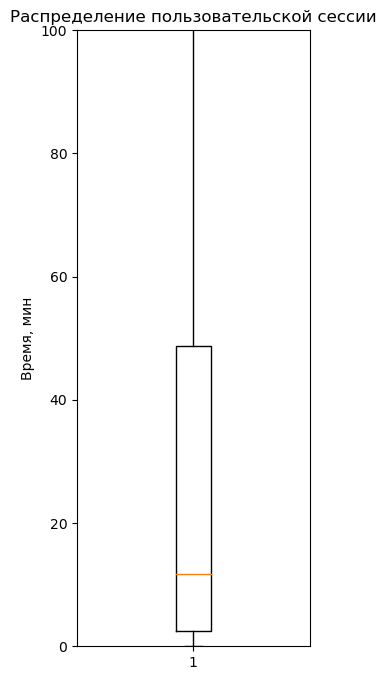

In [100]:
plt.figure(figsize=(3,8))
plt.title('Распределение пользовательской сессии')
plt.ylabel('Время, мин');
plt.boxplot(minutes_in_app)
plt.ylim(0,100);

Ящик с усами показывает на то что основная масса пользователей проводит в приложении времени до 15 минут, а все что свыше 50 минут можно считать выбросами. Увеличим масштаб и посмотрим на выбросы.

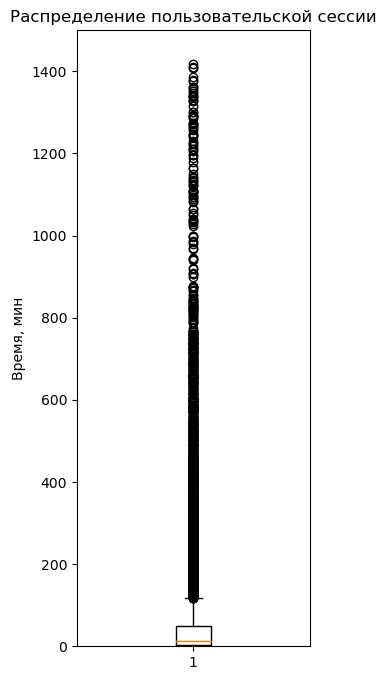

In [101]:
plt.figure(figsize=(3,8))
plt.title('Распределение пользовательской сессии')
plt.ylabel('Время, мин');
plt.boxplot(minutes_in_app)
plt.ylim(0,1500);

Действительно в данных присутствуют выбросы, где время нахождения пользователей в приложении варьируется от 50 до 1500 минут.

### Выводы в ходе исследовательского анализа.

В процессе исследования необходимо провести выделение сценариев использования приложения пользователями и ответить на вопросы:

- Какие события влияют на конверсию в целевое действие?

- Какие сценарии использования приложения выделяются?

- Как различается время между распространенными событиями пользователя?

**В ходе исследования были изучены два датасета: mobile_sourсes и mobile_dataset.**

В **mobile_sourсes** представлены представлены данные о трех источниках из которых пользователи установили приложение:

1) yandex - 1934 пользователя (доля 45.05%);  
2) other - 1230 пользователей (доля 28.65%);  
3) google - 1129 пользователей (доля 26.30%).   

Лидером по источнику установки является yandex. Между другими источниками (other) и источником google разница не слишком значительна.


В **mobile_dataset** содержатся данные о пользователях, тип события и время совершения события. Для удобства в данный датасет были добавлены сведения о источниках установки приложения.

**В ходе исследовательского анализа сформулированы следующие тезисы:**

1)  Самая раняя дата события - 2019-10-07 00:00:00 . Самая поздняя дата события - 2019-11-03 23:58:12
В  датасете фигурируют данные за период равный 27 дней 23 часа 58 минут и 12 секунд.

2) За исследуемый период времени меньше всего пользователи использовали приложение в период с 2019-10-09 по 2019-10-13. А больше всего с 2019-10-29 по 2019-11-01.

3) Распределение событий на каждую дату достаточно равномерно. Однако есть события, которые выделяются: 

- photos_show - значительный пик событий 2019-10-23, 2019-10-26, 2019-10-27, 2019-11-03. Почему-то именно в эти дни пользователи чаще просматривали фото в объявлениях;  
- tips_show - значительный пик событий 2019-10-14, 2019-10-23, 2019-10-29. Именно в эти даты пользователи чаще всего видели рекомендованные объявления. Возможно данный феномен обусловлен техническими причинами со стороны приложения;
- события photos_show и tips_show чаще всего происходили на 43 неделе. 

4) Всего в датасете представлено 74197 событий, что соответствует количеству строк в нашем датасете;  
В датасете данные о 4293 уникальных пользователях;   
В среднем на каждого пользователя приходится по 17 событий;  
В данных присутсвует выброс - максимальное значение 478 событий на пользователя. При таком разбросе данных, лучше применить медианное значение для стабилизации показаний;  
Количество событий на пользователя при использовании медианного значения равно 9.

*Топ 3 события с которыми столкнулись пользователи:*
- tips_show (увидел рекомендованные объявления) - 40 055 событий;  
- photos_show (просмотрел фотографий в объявлении) - 10 012 событий;  
- advert_open (открыл карточки объявления) - 6164 события. 

*Самые редкие события с которыми столкнулись пользователи:*

- search_6 - 460 событий;  
- search_2 - 324 события;  
- search_7 - 222 события.  


5) Одним из ключевых вопросов исследования является: Какие события влияют на конверсию в целевое действие? В нашем случае целевым событием (ЦС) является show_contacts (показать контакты).  
981 пользователь совершил ЦС. В среднем пользователь совершает ЦС - 4.61 раза. Все что выше 5 целевых событий для пользователя можно считать аномалиями. Также у нас есть пользователь, который совершил ЦС - 140 раз. Можем предположить что есть люди, которые активно используют приложение для купли-продажи товаров и тем самым зарабатывают на этом. Следовательно, у таких пользователей количество ЦС будет выше чем у остальных. Также нельзя отрицать, тот факт, что данные могут быть ошибочными и в лог закралась ошибка и действия пользователей были посчитаны некорректно. 

*Можно выделить самые распространненые события, которые совершают пользователи до ЦС (show_contacts):*

- tips_show (увидел рекомендованные объявления)  
- photos_show (просмотр фотографий в объявлении)  

Эти два события являются самыми значимыми для наступления ЦС.

*Также можно выделить наименее значимые события:*
- tips_click (кликнул по по рекомендованному объявлению)  
- favorites_add (добавление объявления в избранное)  
- map (открыл карту размещенных объявлений)

6) Количество всех событий кроме целевого = 69668 

Общая конверсия в событие show_contacts - 22.25%

Конверсия цепочки событий:

- tips_show -> show_contacts 18.42%;
- map -> show_contacts 19.85%;
- search_all -> show_contacts 22.63%;
- photos_show -> show_contacts 30.96%;
- favorites_add -> show_contacts 38.75%;
- show_contacts -> show_contacts 100.00%;
- contacts_call -> show_contacts 100.00%;
- advert_open -> show_contacts 18.38%;
- tips_click -> 31.06%.

Как видно из конверсий, только 18.38% пользователей открывших приложение (advert_open) доходят до ЦС. Переход по рекомендуемым объявлениям помогает пользователям совершать ЦС, доля таких людей 31.06% (tips_click). Просмотр фотографий (photos_show) также положительно влияет на совершение ЦС конверсия составляет 30.96%, равно как и добавление в избранное (favorites_add) конверсия 38.75%

7) Следующий ключевой вопрос на который необходимо ответить: Как различается время между распространенными событиями пользователя?

Среднее время до совершения ЦС - 1 days 12:00:42.995622038
Медианное время до совершения ЦС - 0 days 00:22:53.561807

Основная часть выбросов - это пользователи у которых до совершения ЦС прошло более 3500 минут в приложении. Основная масса тратит до наступления ЦС до 1500 минут.

8) Количество времени проведенного в приложении: 
Медианное время пользователей в приложении составляет 11 минут и 48 секунд. Большинству людей наверняка будет достаточно этого времени для поиска интересующего товара и добавления интересных объявлений в избранное. 


9) Какие сценарии использования приложения выделяются?
Основные сценарии использования приложения tips_show - show_contacts, photos_show -> show_contacts. Также могут быть сценарии, когда пользователь не совершил целевое событие например tips_click -> map, map-> favorites_add, tips_click->favorites_add. 

## Исследование гипотез.

- Проверьте статистические гипотезы
    1. Одни пользователи совершают действия `tips_show` и `tips_click`, другие — только `tips_show`. 
    Проверьте гипотезу: конверсия в просмотры контактов различается у этих двух групп.    
    
    2.Нулевая гипотеза - Событие map не оказывает существенного влияния на добавление в избранное(favorites_add). Альтернативная гипотеза - Событие map оказывает влияние на добавление объявления в избранное(favorites_add).

### Проверка первой гипотезы.

Для проверки первой гипотезы нам подходит метод - проверка гипотезы о равенстве показателей выборок.

Сделаем срез по пользователям выделив тех кто совершал действия tips_show и tips_click, а другие только tips_show.

**Выделим всех пользователей, кто совершил "tips_show", а затем разделим их на 2 группы - кто совершал "tips_click" и кто нет.**

In [102]:
tips_show_users = mobile_dataset.query('event_name =="tips_show"')['user_id'].unique().tolist()
print('Кол-во пользователей все события "tips_show" =', len(tips_show_users))

tips_show_click_users = mobile_dataset.query('event_name =="tips_click" and user_id==@tips_show_users')['user_id'].unique().tolist()
print('Кол-во пользователей совершивших события "tips_show"+"tips_click" =', len(tips_show_click_users))

only_tips_show_users = list(set(tips_show_users) - set(tips_show_click_users))
print('Кол-во пользователей только события "tips_show" =', len(only_tips_show_users))

Кол-во пользователей все события "tips_show" = 2801
Кол-во пользователей совершивших события "tips_show"+"tips_click" = 297
Кол-во пользователей только события "tips_show" = 2504


**Теперь подсчитаем количетсво пользователей в каждой из групп**

In [103]:
show_click_events = mobile_dataset.query('user_id==@tips_show_click_users')[['user_id', 'event_name']]
print('Кол-во пользователей совершивших ЦС в группе tips_show+click users - ', show_click_events[show_click_events['event_name']=="show_contacts"]['user_id'].nunique())



Кол-во пользователей совершивших ЦС в группе tips_show+click users -  91


In [104]:
only_show_events = mobile_dataset.query('user_id==@only_tips_show_users')[['user_id', 'event_name']]
print('Кол-во пользователей совершивших ЦС в групе tips_show users - ', only_show_events[only_show_events['event_name']=="show_contacts"]['user_id'].nunique())


Кол-во пользователей совершивших ЦС в групе tips_show users -  425


У нас есть необходимые данные для проверки гипотезы, воспользуемся функцией stat_test, которая проводит тестирование на равенство долей, где 

successes - кол-во успешных попыток [группа1, группа2]  
trials - всего попыток [группа1, группа2]  
alpha - критический уровень статистической значимости  

Сформулируем гипотезу - конверсия в просмотры контактов не различается у этих двух групп (пользователи с событиями tips_show и tips_click; пользователи с событием tips_show). Альтернативная гипотеза будет звучать так - конверсия в просмотры различается у этих двух групп.

Запишем данные для выборки success в следующие переменные:

In [105]:
user_count_group_1 = only_show_events[only_show_events['event_name']=="show_contacts"]['user_id'].nunique()
user_count_group_2 = show_click_events[show_click_events['event_name']=="show_contacts"]['user_id'].nunique()

count_events_group_1 = len(only_tips_show_users)
count_events_group_2 = len(tips_show_click_users)

In [106]:
def stat_test(successes, trials, alpha):  

    # alpha = .05 # критический уровень статистической значимости

    alpha = alpha
    successes = successes
    trials = trials

    # пропорция успехов в первой группе:
    p1 = successes[0]/trials[0]

    # пропорция успехов во второй группе:
    p2 = successes[1]/trials[1]

    # пропорция успехов в комбинированном датасете:
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

    # разница пропорций в датасетах
    difference = p1 - p2


    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1) 


    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(
        p_combined * (1 - p_combined) * (1 / trials[0] + 1 / trials[1])
    )

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print(
            'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
        )  

In [107]:
alpha = .05
successes = [user_count_group_1, user_count_group_2]
trials = [count_events_group_1, count_events_group_2]

stat_test(successes, trials, alpha)  

p-значение:  9.218316554537864e-09
Отвергаем нулевую гипотезу: между долями есть значимая разница


Нулевая гипотеза не подтвердилась - между группами есть разница. Следовательно событие tips_click ведет к увеличению конверсии в ЦС (contacts_show).

### Проверка второй гипотезы.

Нулевая гипотеза - Событие map не оказывает существенного влияния на добавление в избранное(favorites_add). Альтернативная гипотеза - Событие map оказывает влияние на добавление объявления в избранное(favorites_add).

В данной гипотезе целевым событием будет - favorites_add.

Для проверки данной гипотезы можно использовать статистический тест на сравнение долей двух групп.(z-test) Подготовим данные к проверке.

**Сделаем срез по пользователям выделив тех кто совершал действия map и favorites_add а другие только favorites_add. Разделим их на две группы.**

In [108]:
all_users = mobile_dataset['user_id'].unique().tolist()


all_map_user = mobile_dataset.query('event_name == "map"')['user_id'].unique().tolist()
print('Кол-во всех пользователей совершивших событие "map" -', len(all_map_user))

map_favorites_add_user = mobile_dataset.query('event_name == "favorites_add" and user_id==@all_map_user')['user_id'].unique().tolist()
print('Кол-во всех пользователей совершивших события "map" и "favorites_add" -', len(map_favorites_add_user))

non_map_users = list(set(all_users) - set(all_map_user))
print('Количество пользователей, не совершавших событие "map":', len(non_map_users))

no_map_user_favorites_add =  mobile_dataset.query('event_name == "favorites_add" and user_id==@non_map_users')['user_id'].unique().tolist()
print('Кол-во всех пользователей НЕ совершивших событие "map" и совершивших "favorites_add"  -', len(no_map_user_favorites_add))

Кол-во всех пользователей совершивших событие "map" - 1456
Кол-во всех пользователей совершивших события "map" и "favorites_add" - 64
Количество пользователей, не совершавших событие "map": 2837
Кол-во всех пользователей НЕ совершивших событие "map" и совершивших "favorites_add"  - 287


In [109]:
#уровень значимости
alpha = 0.05

In [110]:
map_count = mobile_dataset[mobile_dataset['event_name'] == 'map']['user_id'].nunique()
no_map_count = mobile_dataset[mobile_dataset['event_name'] != 'map']['user_id'].nunique()

In [111]:
p1 = len(map_favorites_add_user) / map_count
p2 = len(no_map_user_favorites_add) / no_map_count

In [112]:
#выводим пропорции
print(f"Пропорция для события 'map' и 'favorite_add': {p1:.4f}")
print(f"Пропорция для остальных событий и 'favorite_add': {p2:.4f}")

Пропорция для события 'map' и 'favorite_add': 0.0440
Пропорция для остальных событий и 'favorite_add': 0.0673


In [113]:
#проводим тест
results = proportions_ztest(count=[len(map_favorites_add_user), len(no_map_user_favorites_add)],
nobs=[map_count, no_map_count],
alternative='larger')

In [114]:
#выводим результаты теста
print(f"p-value: {results[1]:.4f}")
if (results[1] < alpha):
    print("Отвергаем нулевую гипотезу: Событие map оказывает влияние на добавление объявления в избранное.")
else:
    print("Не получилось отвергнуть нулевую гипотезу: Событие map не оказывает существенного влияния на добавление объявления в избранное.")

p-value: 0.9993
Не получилось отвергнуть нулевую гипотезу: Событие map не оказывает существенного влияния на добавление объявления в избранное.


Нулевая гипотеза подтвердилась - между группами нет существенных различий. Следовательно событие map не ведет к увеличению конверсии в ЦС (favorites_add).

## Итоговый вывод по проекту.

В ходе исследования были получены ответы на три ключевых вопроса заказчика:

**1) Какие события влияют на конверсию в целевое действие?** 

В нашем случае целевым событием (ЦС) является show_contacts (показать контакты). 

*Можно выделить самые распространненые события, которые совершают пользователи до ЦС (show_contacts):*

- tips_show (увидел рекомендованные объявления)  
- photos_show (просмотр фотографий в объявлении)  

Эти два события являются самыми значимыми для наступления ЦС.

**2) Как различается время между распространенными событиями пользователя?**

Среднее время до совершения ЦС - 1 days 12:00:42
Медианное время до совершения ЦС - 0 days 00:22:53

Основная часть выбросов - это пользователи у которых до совершения ЦС прошло более 3500 минут в приложении. Основная масса тратит до наступления ЦС до 1500 минут.

У большинства пользователей сессия занимает до 150 минут. Аномально долгими можно считать сессии дольше 10000 минут. Подавляющее большинство сессий не выходит за рамки 5000 минут.

**3) Какие сценарии использования приложения выделяются?** 

Основные сценарии использования приложения tips_show - show_contacts, photos_show -> show_contacts. Также могут быть сценарии, когда пользователь не совершил целевое событие например tips_click -> map, map-> favorites_add, tips_click->favorites_add.


**Исследования гипотез:**

1) Нулевая гипотеза не подтвердилась - между группами есть разница. Следовательно событие tips_click ведет к увеличению конверсии в ЦС (contacts_show).

2) Нулевая гипотеза подтвердилась - между группами нет существенных различий ,следовательно событие map не ведет к увеличению конверсии в ЦС (favorites_add).


**Рекомендации:**

1) Канал yandex является самым успешным источником из которого пользователи установили приложение (1934 пользователя (доля 45.05%)) возможно имеет смысл увеличить затраты на маркетинг и привлекать больше пользователей в приложении именно через этот источник.

2) В приложении присутствуют события вероятно отвечающие за поиск объявлений - search_2, search_3, search_4, search_6, search_7, для удобства пользователя и работы с метриками было бы неплохо объединить эти события в одно (если это технически возможно)

3) С точки зрения конверсии в целевое событие самыми эффективным являются события - tips_click (31.06%), photos_show (30.96%) а также - favorites_add (38.75%). Стоит продолжать работать с этими событиями, чтобы пользователи достигали конечной цели в виде целевого события. 

## Презентация по проекту.

[Ссылка на презентацию](https://disk.yandex.ru/i/RxpSe7K6RZqgGg "Нажми для перехода")

## Дашборд.

Создадим файл с датасетом и запишем туда данные.

In [115]:
mobile_dataset

event_time     event_name  \
0     2019-10-07 13:39:45      tips_show   
1     2019-10-07 13:40:31      tips_show   
2     2019-10-07 13:41:05      tips_show   
3     2019-10-07 13:43:20      tips_show   
4     2019-10-07 13:45:30      tips_show   
...                   ...            ...   
74192 2019-11-03 15:51:23      tips_show   
74193 2019-11-03 15:51:57  show_contacts   
74194 2019-11-03 16:07:40      tips_show   
74195 2019-11-03 16:08:18      tips_show   
74196 2019-11-03 16:08:25      tips_show   

                                    user_id  source  week        date  \
0      0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other    41  2019-10-07   
1      0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other    41  2019-10-07   
2      0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other    41  2019-10-07   
3      0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other    41  2019-10-07   
4      0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other    41  2019-10-07   
...                                     ...     ...   ...         ...   
74192  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google    44  2019-11-03   
74193  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google    44  2019-11-03   
74194  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google    44  2019-11-03   
74195  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google    44  2019-11-03   
74196  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google    44  2019-11-03   

       session_id  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
74192        7816  
74193        7816  
74194        7816  
74195        7816  
74196        7816  

[74197 rows x 7 columns]

In [116]:
 mobile_dataset[['event_time', 'event_name', 'user_id', 'source','week','date']].to_csv('project_for_tableau.csv', index = True)

In [117]:
pd.read_csv('project_for_tableau.csv')

Unnamed: 0           event_time     event_name  \
0               0  2019-10-07 13:39:45      tips_show   
1               1  2019-10-07 13:40:31      tips_show   
2               2  2019-10-07 13:41:05      tips_show   
3               3  2019-10-07 13:43:20      tips_show   
4               4  2019-10-07 13:45:30      tips_show   
...           ...                  ...            ...   
74192       74192  2019-11-03 15:51:23      tips_show   
74193       74193  2019-11-03 15:51:57  show_contacts   
74194       74194  2019-11-03 16:07:40      tips_show   
74195       74195  2019-11-03 16:08:18      tips_show   
74196       74196  2019-11-03 16:08:25      tips_show   

                                    user_id  source  week        date  
0      0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other    41  2019-10-07  
1      0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other    41  2019-10-07  
2      0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other    41  2019-10-07  
3      0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other    41  2019-10-07  
4      0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other    41  2019-10-07  
...                                     ...     ...   ...         ...  
74192  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google    44  2019-11-03  
74193  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google    44  2019-11-03  
74194  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google    44  2019-11-03  
74195  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google    44  2019-11-03  
74196  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google    44  2019-11-03  

[74197 rows x 7 columns]

[Ссылка на дашборд](https://public.tableau.com/app/profile/sergei.v8049/viz/final_project_dashboard_16770688073070/dashboard_project?publish=yes "Нажми для перехода")

1. Набор №1
    1. Постройте диаграмму распределения количества событий по типу события.
    2. Добавьте индикатор количества пользователей.
    3. Добавьте фильтр дашборда по дате совершения события.